# Question I am asking
* Identify what types of feature are there in the dataset
* Find trend for features based on their type
* Find out if there are any correlations between features

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
df = pd.read_csv('train.csv', nrows=5000)
df.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0              0              0              1              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              0              1              0              0       ...         
4              0              1              0              0       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [122]:
## dataset said that there are columns that are catogorical, plot those values and see
## try to get only the integer columns
columns = list(df.columns)
columns.remove('id')
count_dict = {}
for column in columns:
    if type(df[column][0]) == np.int64:
        count_dict[column] = Counter()
for column in count_dict:
    for ele in df[column]:
        if ele in count_dict[column]:
            count_dict[column][ele] = count_dict[column][ele] + 1
        else:
            count_dict[column][ele] = 1
count_dict

{'ps_calc_04': Counter({0: 197, 1: 956, 2: 1638, 3: 1421, 4: 684, 5: 104}),
 'ps_calc_05': Counter({0: 528,
          1: 1473,
          2: 1554,
          3: 1022,
          4: 349,
          5: 67,
          6: 7}),
 'ps_calc_06': Counter({2: 1,
          3: 11,
          4: 56,
          5: 200,
          6: 635,
          7: 1155,
          8: 1421,
          9: 1138,
          10: 383}),
 'ps_calc_07': Counter({0: 129,
          1: 582,
          2: 1169,
          3: 1412,
          4: 976,
          5: 516,
          6: 172,
          7: 40,
          8: 4}),
 'ps_calc_08': Counter({3: 1,
          4: 7,
          5: 39,
          6: 151,
          7: 411,
          8: 859,
          9: 1256,
          10: 1309,
          11: 775,
          12: 192}),
 'ps_calc_09': Counter({0: 287,
          1: 1030,
          2: 1545,
          3: 1252,
          4: 641,
          5: 200,
          6: 43,
          7: 2}),
 'ps_calc_10': Counter({0: 1,
          1: 15,
          2: 26,
       

In [22]:
def plot_binary(column_name):
    data = count_dict[column_name]
    x = list(data.keys())
    y = list(data.values())
    plt.title(column_name)
    plt.bar(x, height=y)
    plt.xticks([0, 1], ['0', '1'])
    plt.ylabel('Count');
    plt.show()

In [24]:
def plot_category(column_name):
    data = count_dict[column_name]
    x = list(data.keys())
    y = list(data.values())
    plt.title(column_name)
    plt.bar(x, height=y)
    plt.xticks(x, x)
    plt.ylabel('Count');
    plt.show()

In [138]:
def plot_float(column_name):
    x = df[column_name]
    plt.title(column_name)
    plt.hist(x, bins=100)
    plt.ylabel('Value');
    plt.show()

In [193]:
def plot_int(column_name):
    x = df[column_name]
    bin_labels = sorted(list(count_dict[column_name].keys()))
    counts = np.bincount(x)
    index_to_delete = np.where(counts==0)[0]
    counts = np.delete(counts, index_to_delete)
    fig, ax = plt.subplots(1, 1)
    ax.bar(bin_labels, counts)
    ax.set(xticks=bin_labels)
    plt.title(column_name)
    plt.ylabel('Value');
    plt.show(1, 1)

In [112]:
def plot_scatter(x_column_name, y_column_name):
    x = np.unique(df[x_column_name])
    y = np.unique(df[y_column_name])
    zipped = zip(x, y)
    counter = Counter()
    for index, row in df.iterrows():
        key = (row[x_column_name], row[y_column_name])
        if key in counter:
            counter[key] = counter[key] + 1
        else:
            counter[key] = 1
    data_x = list()
    data_y = list()
    data_size = list()
    max_size = counter.most_common(1)[0][1]
    for k, v in counter.items():
        k_x, k_y = k
        data_x.append(k_x)
        data_y.append(k_y)
        data_size.append(v / max_size * 500)
    plt.title(x_column_name + ' and ' + y_column_name)
    marker_size = list(map((lambda x: x **2), counter.values()))
    plt.scatter(data_x, data_y, s=data_size)
    plt.show()
    


In [129]:
bin_columns = list(filter(lambda x: x.endswith('_bin'), columns))
category_columns = list(filter(lambda x: x.endswith('_cat'), columns))
other_columns = list(filter(lambda x: not x.endswith('_bin') and not x.endswith('_cat'), columns))
int_columns = list(filter(lambda x: type(df[x][0]) == np.int64, other_columns))
float_columns = list(filter(lambda x: type(df[x][0]) == np.float64, other_columns))

# Investigate data by plotting them out
* Use bar charts to plot out individual features
* Use scatter plot for finding correlation between 2 features

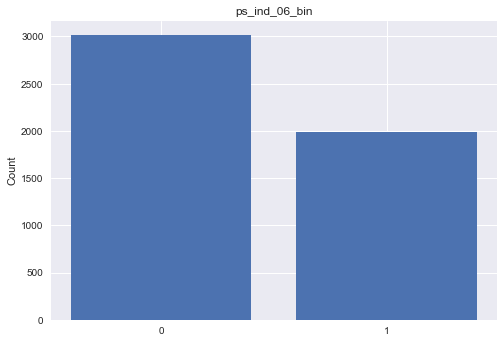

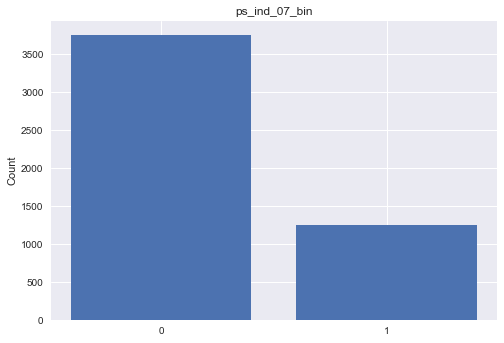

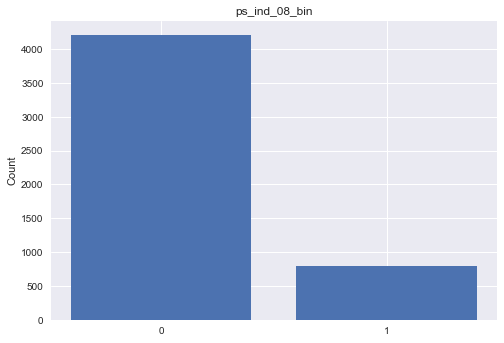

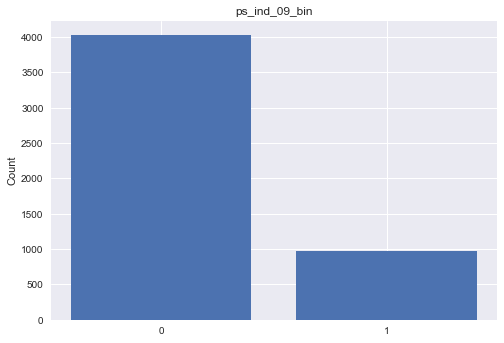

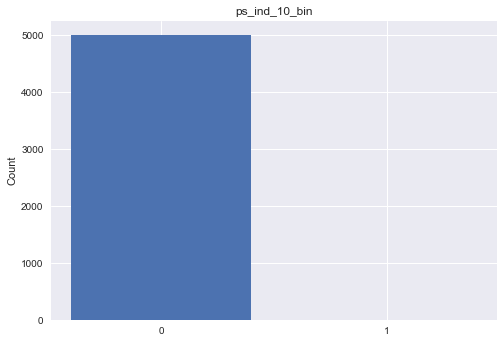

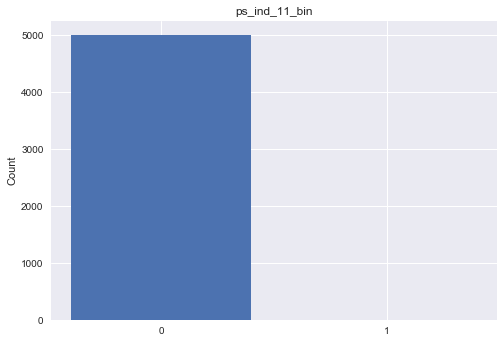

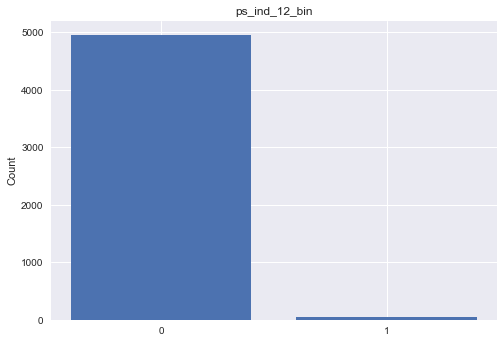

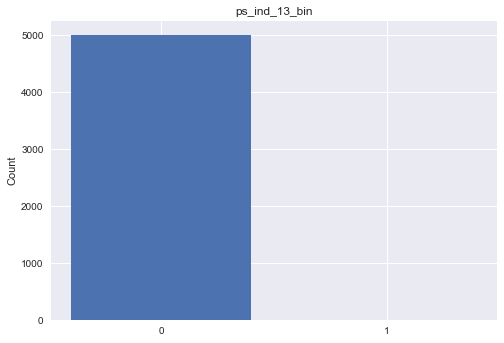

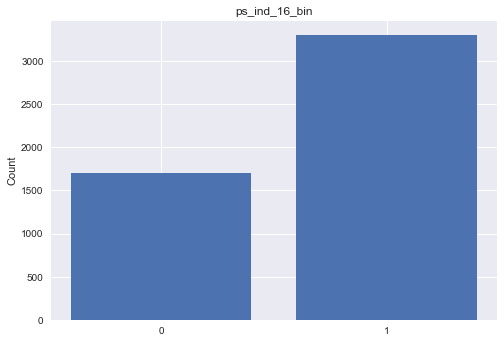

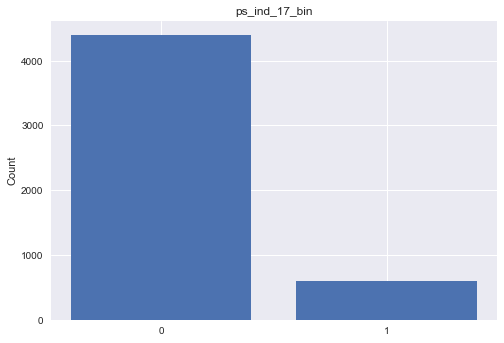

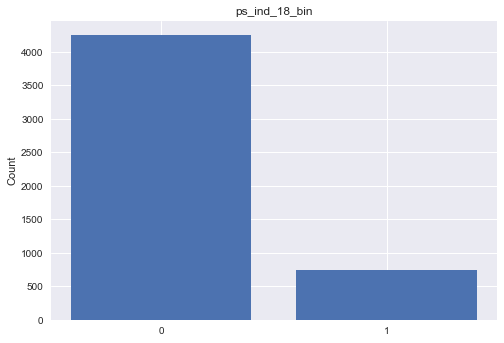

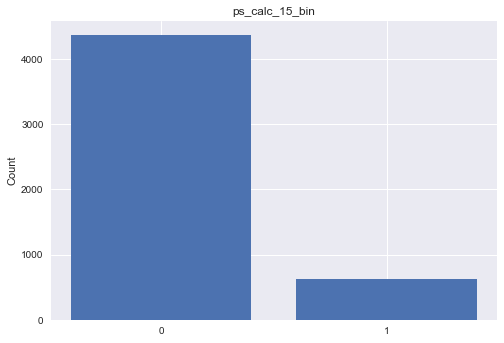

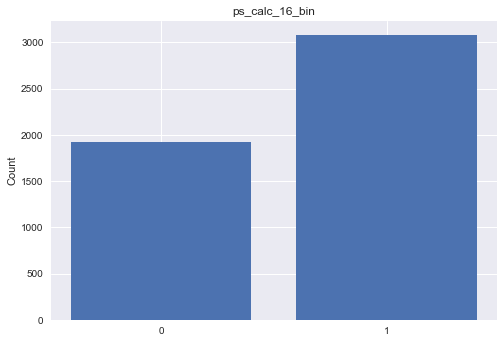

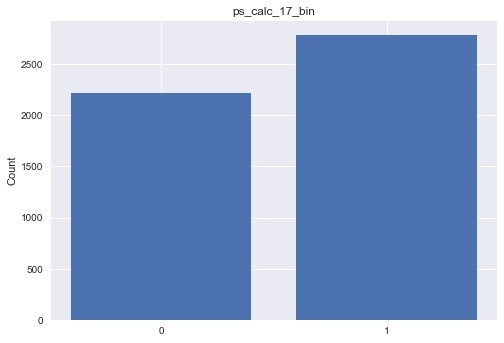

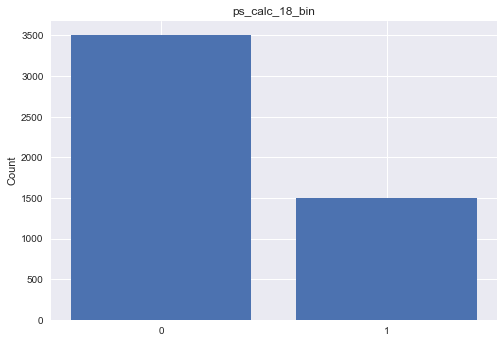

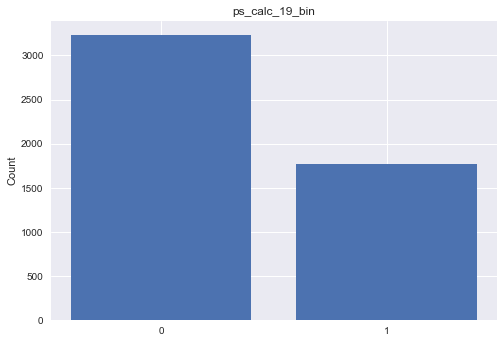

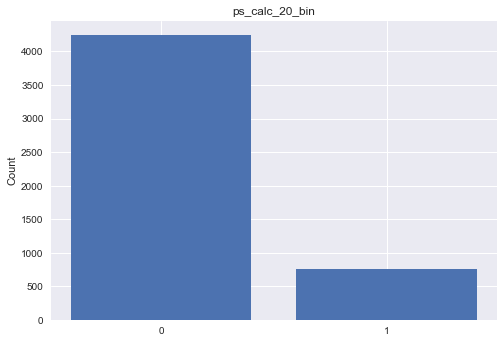

In [130]:
for col in bin_columns:
    plot_binary(col)

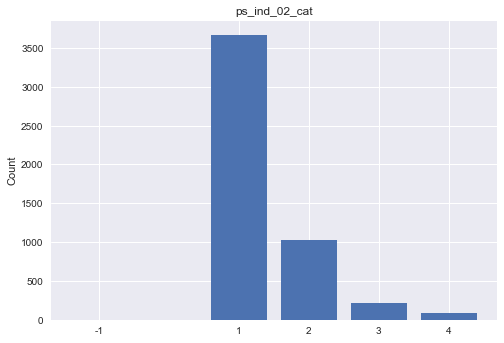

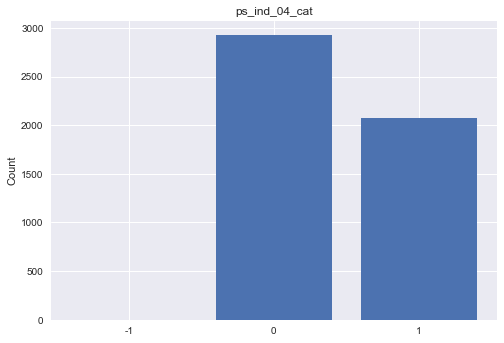

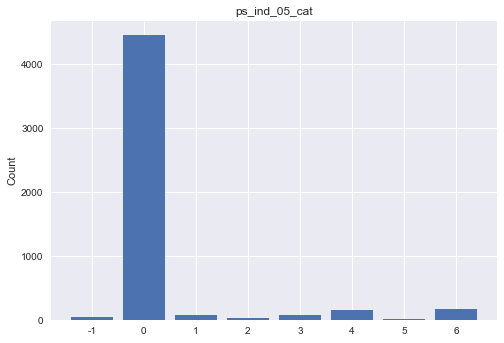

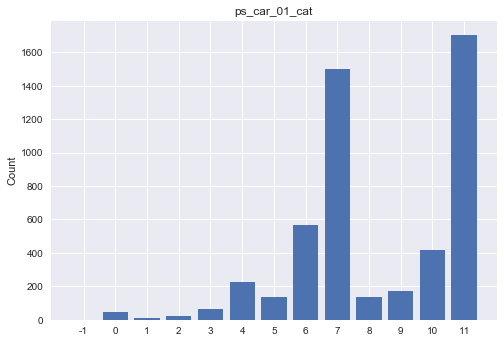

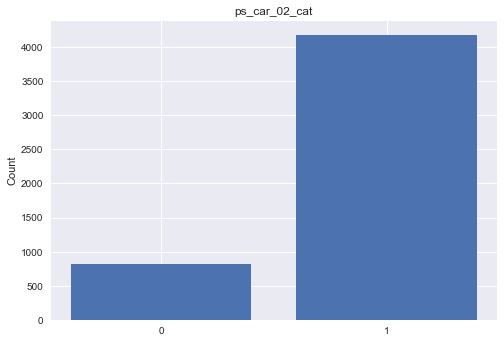

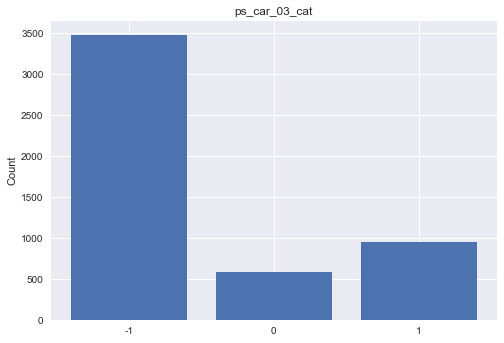

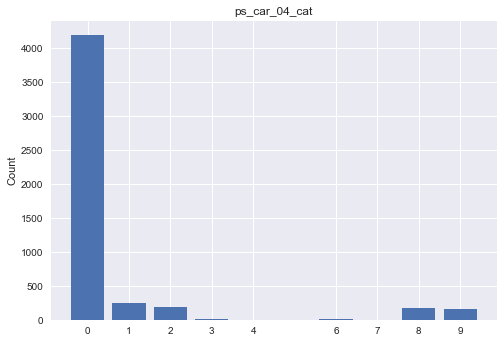

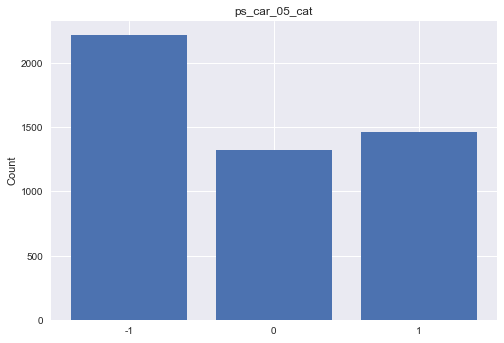

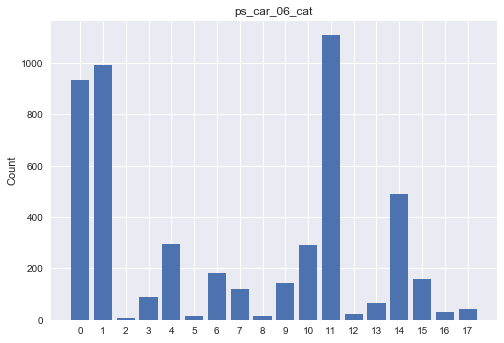

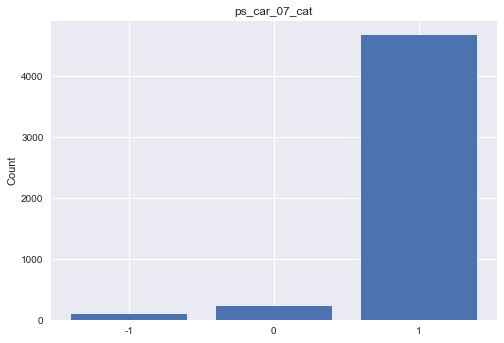

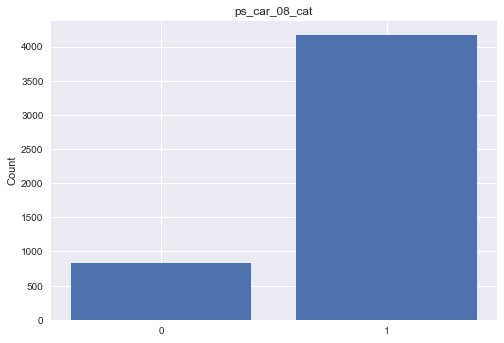

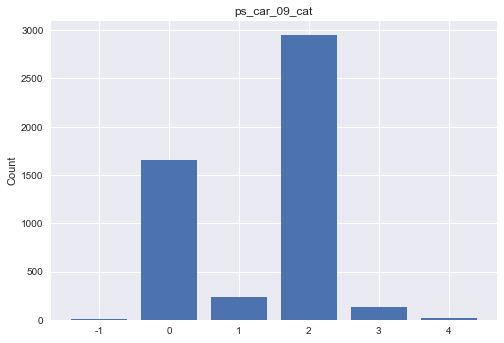

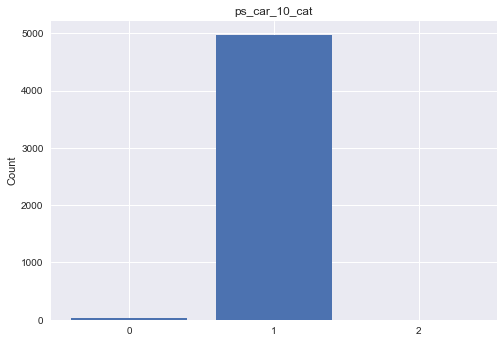

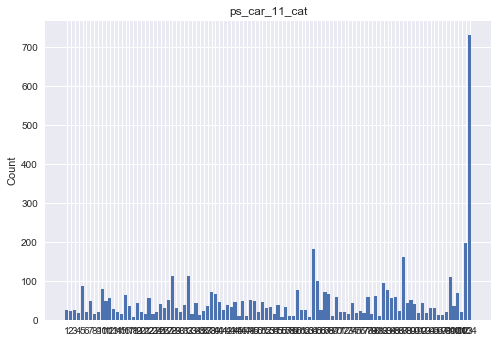

In [132]:
for col in category_columns:
    plot_category(col)

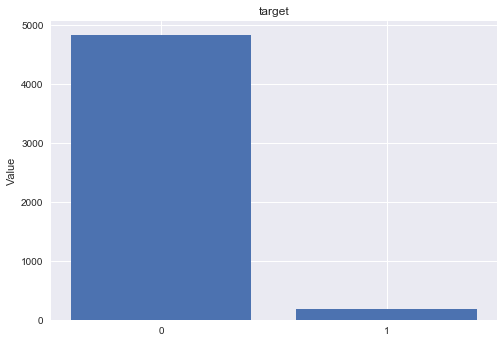

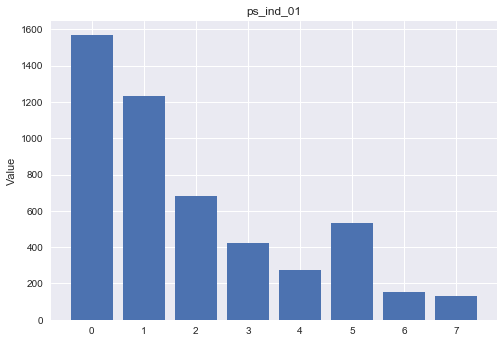

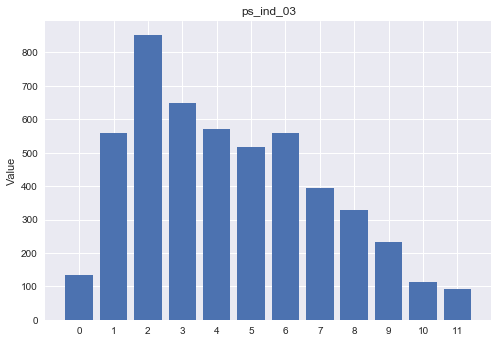

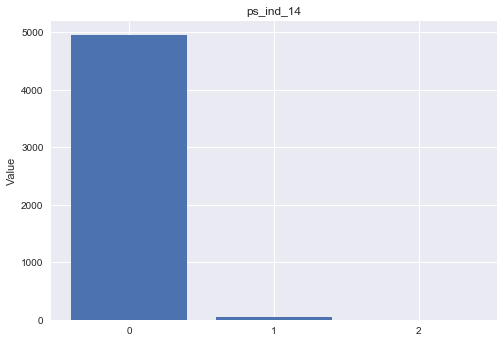

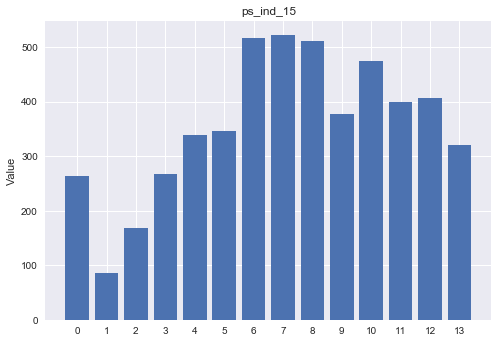

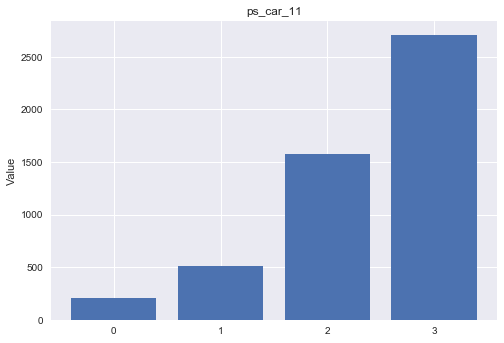

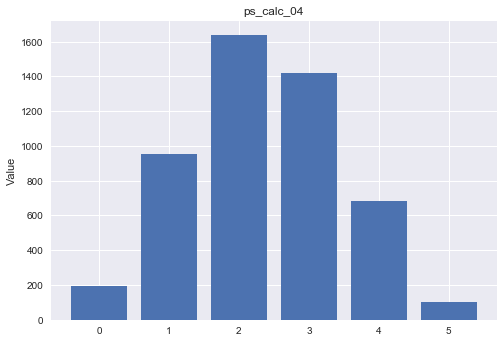

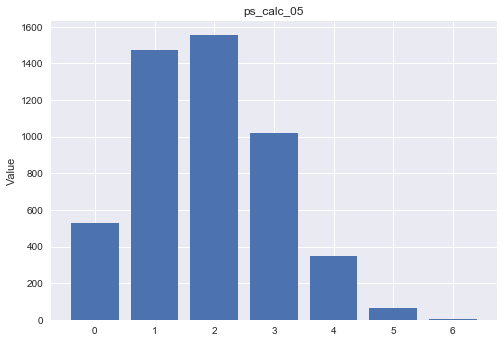

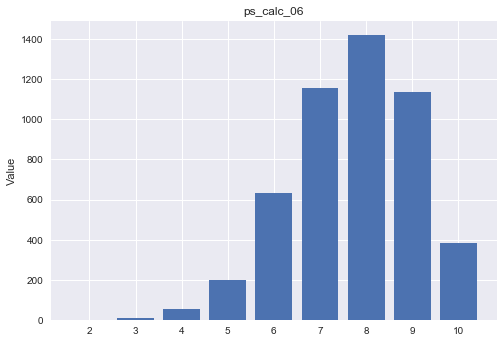

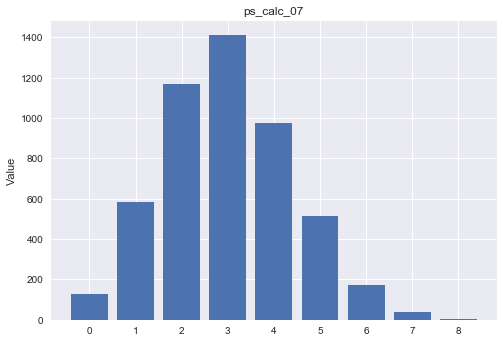

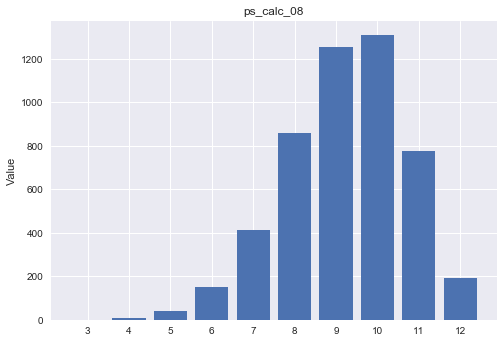

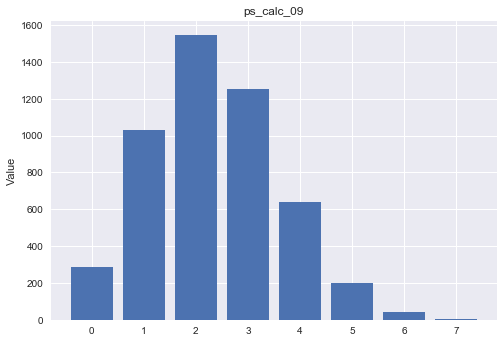

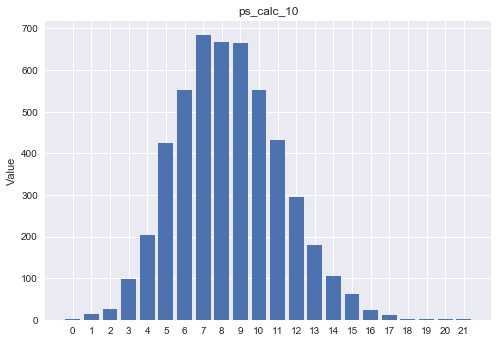

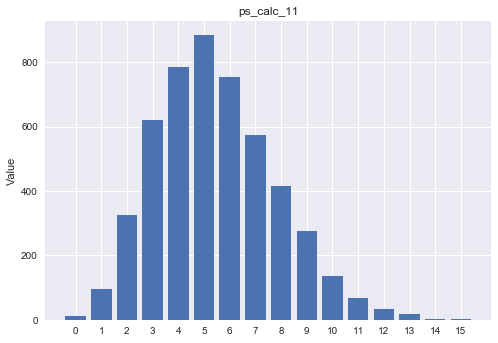

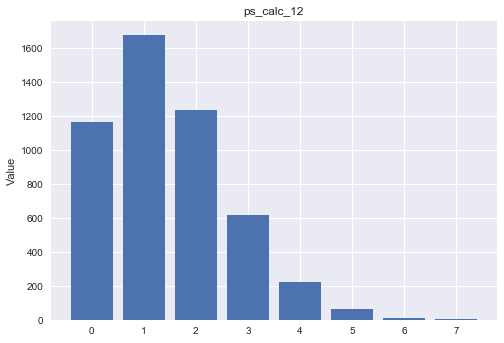

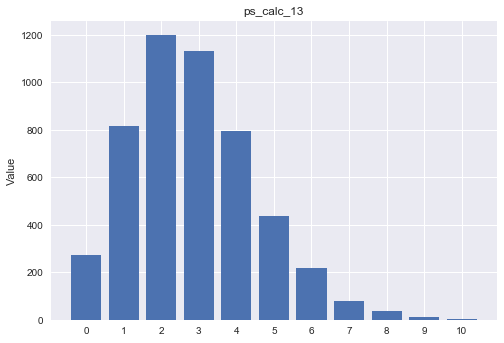

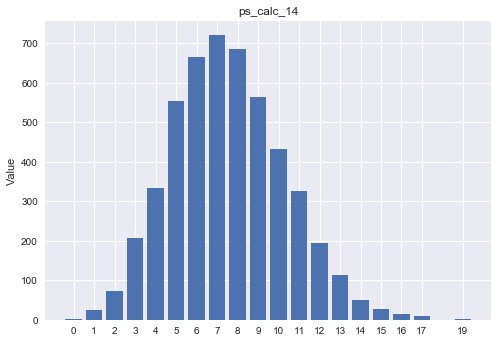

In [195]:
for col in int_columns:
    plot_int(col)

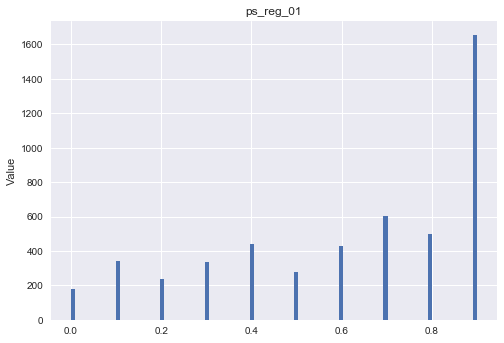

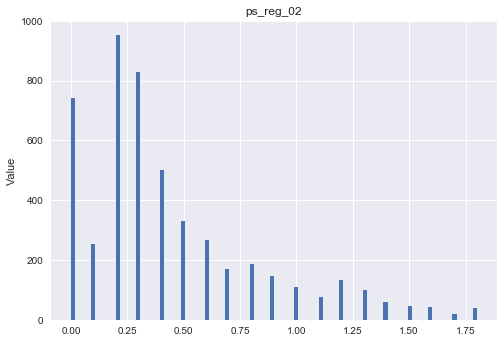

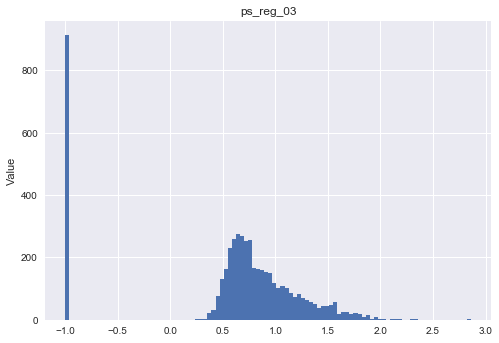

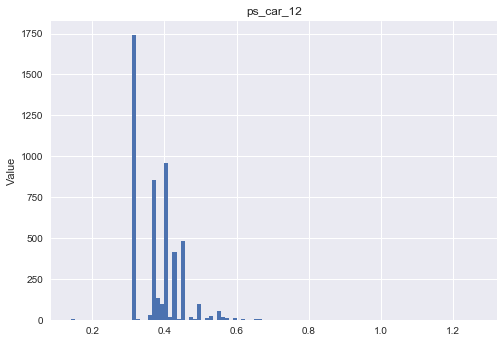

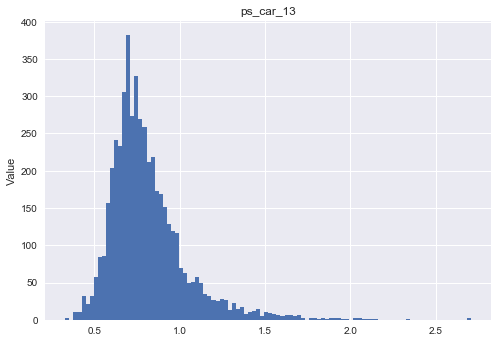

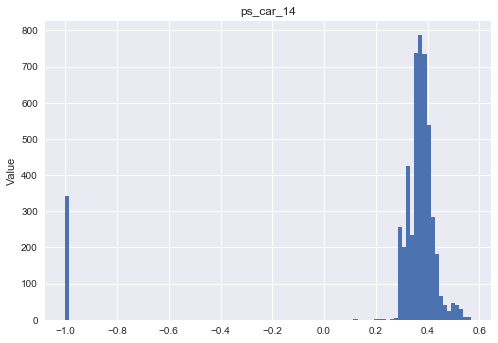

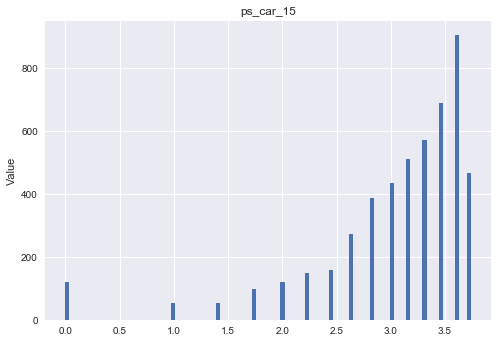

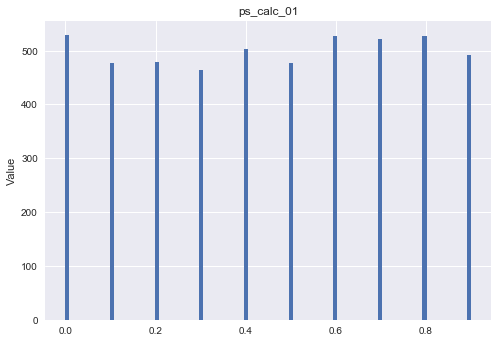

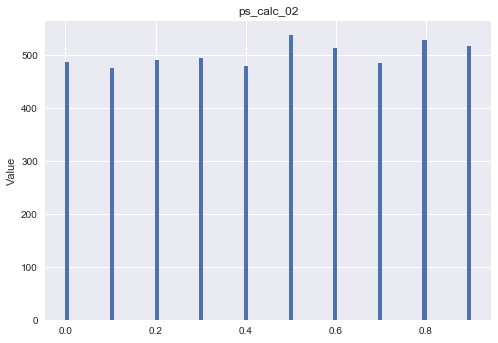

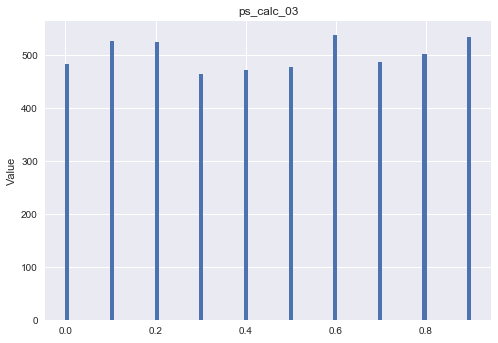

In [196]:
for col in float_columns:
    plot_float(col)

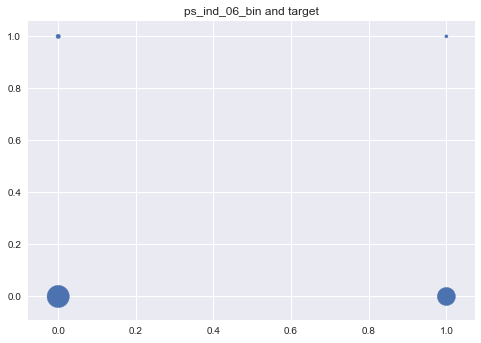

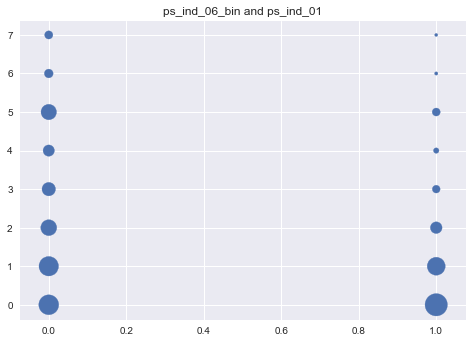

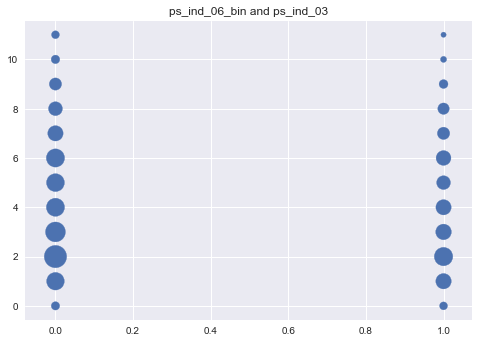

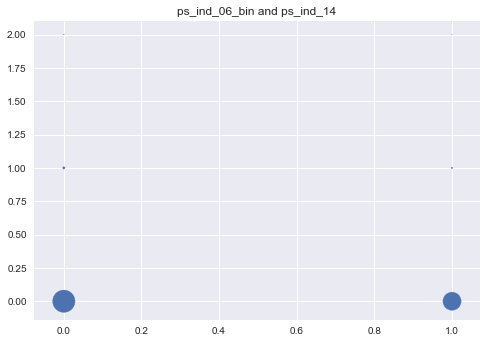

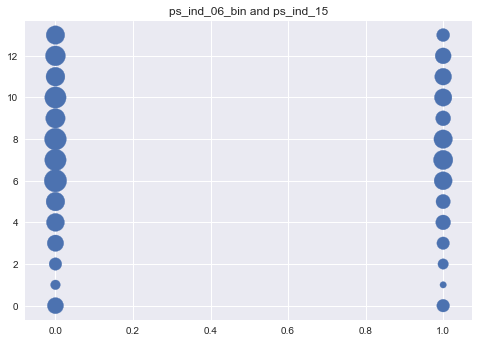

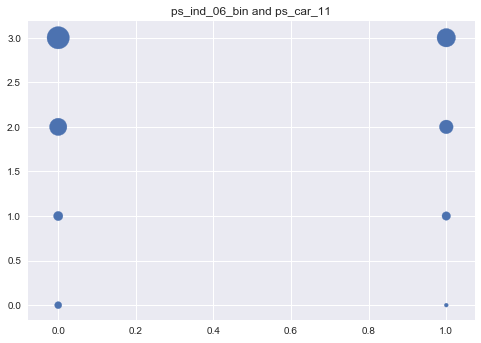

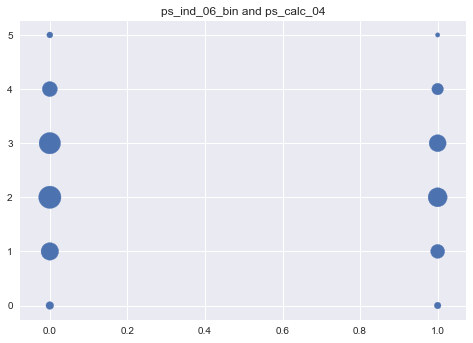

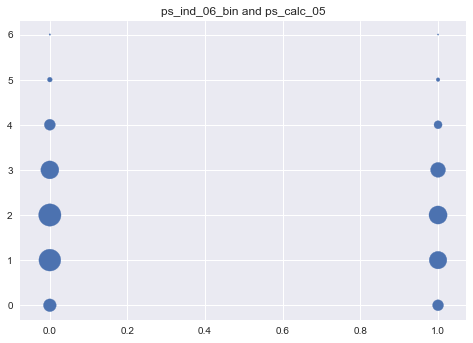

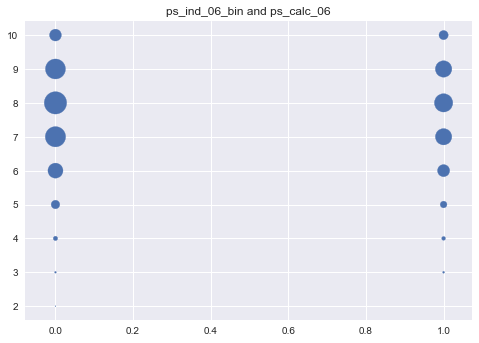

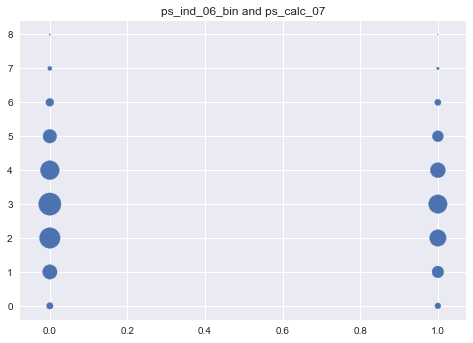

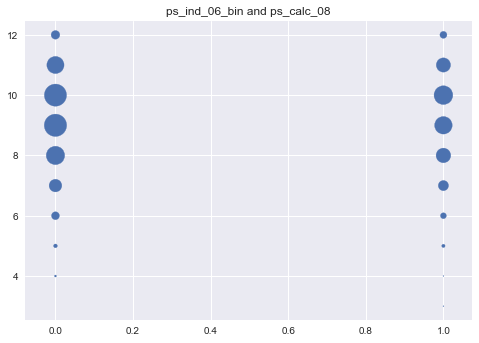

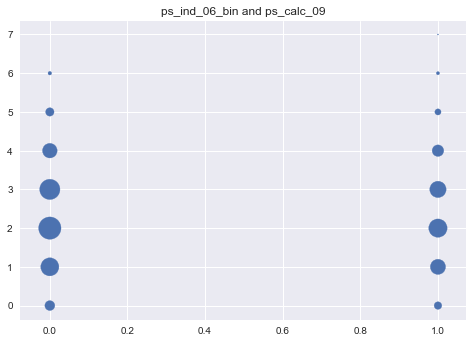

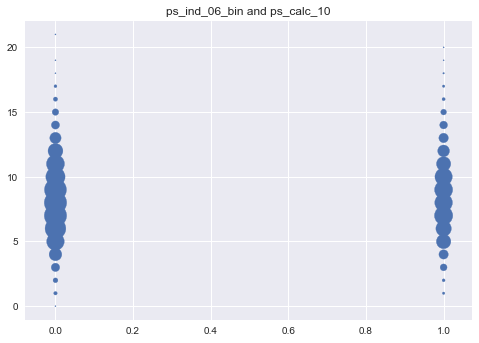

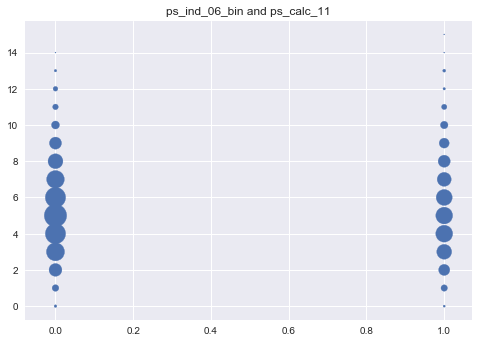

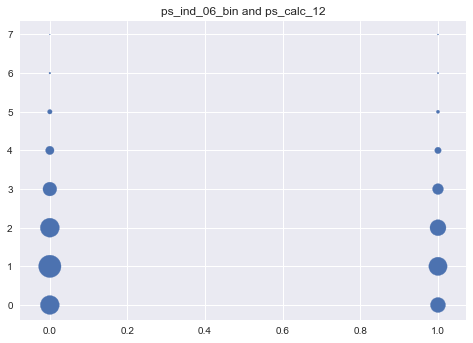

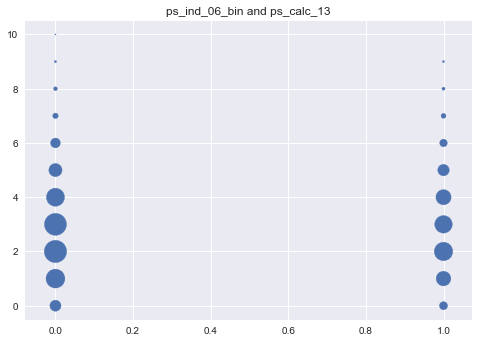

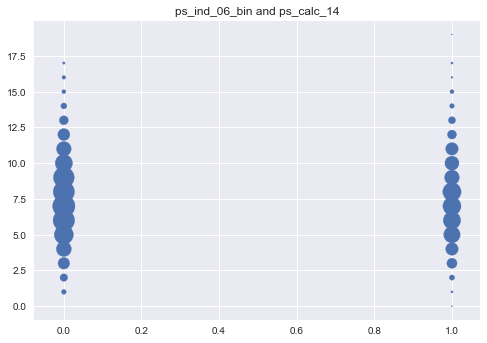

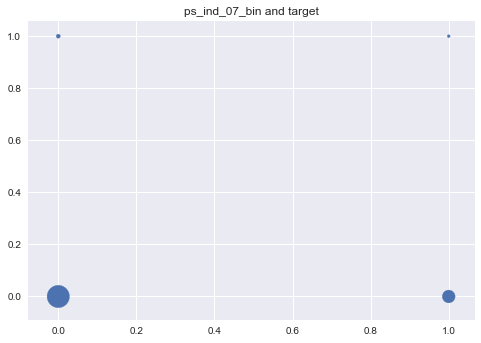

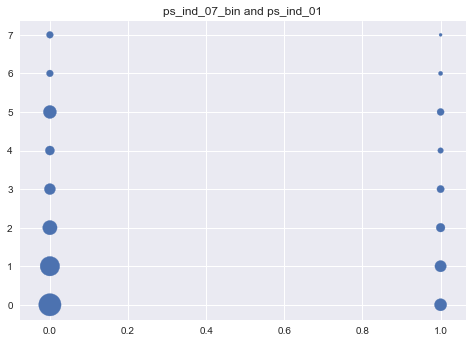

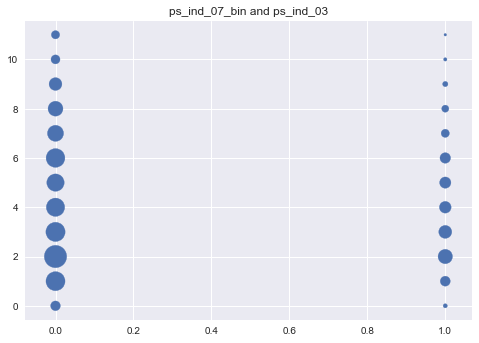

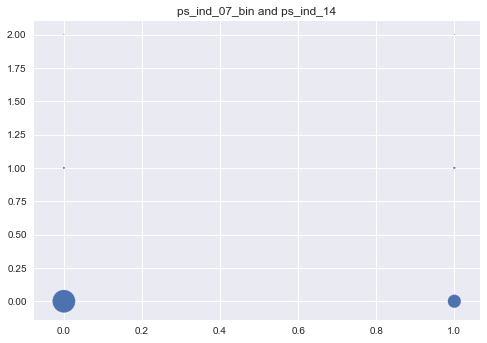

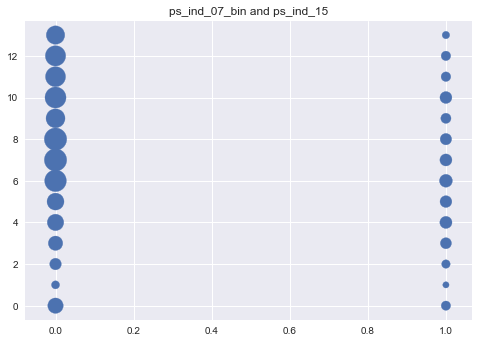

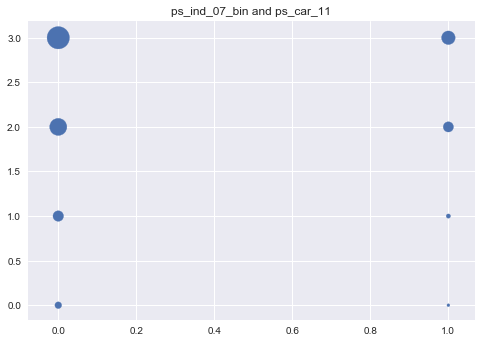

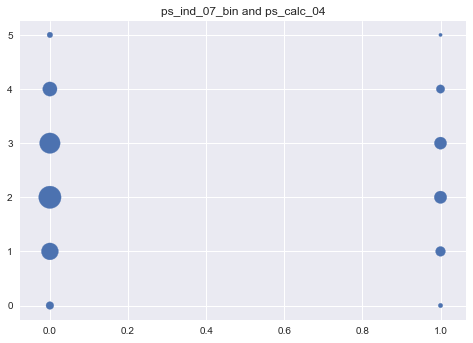

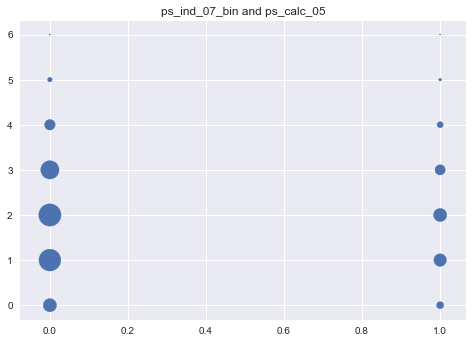

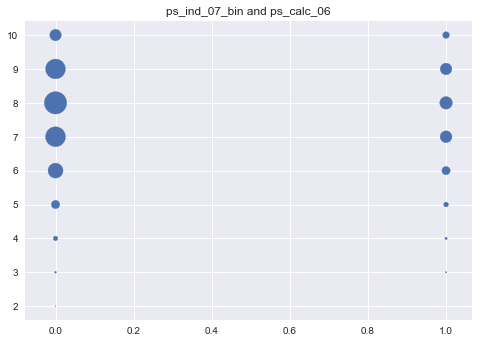

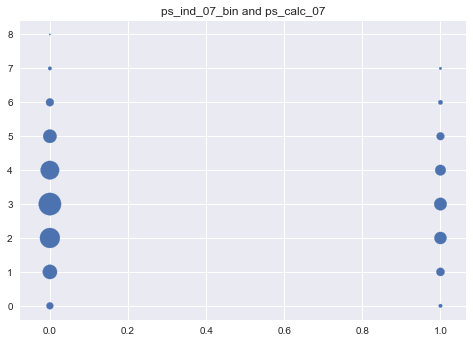

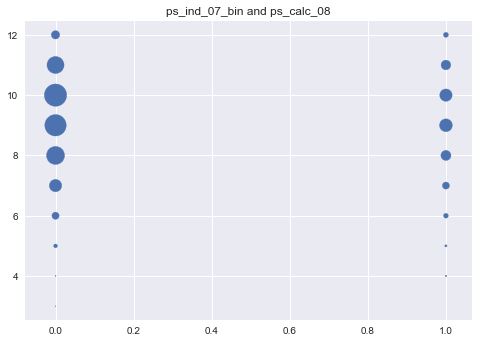

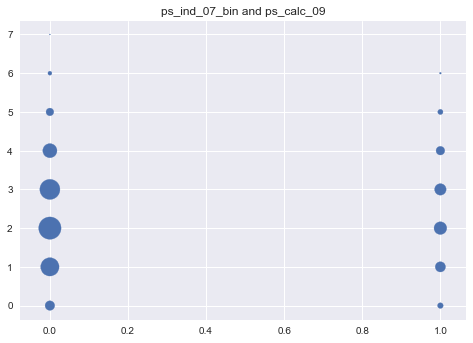

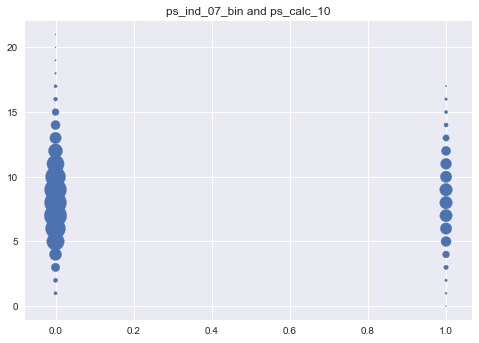

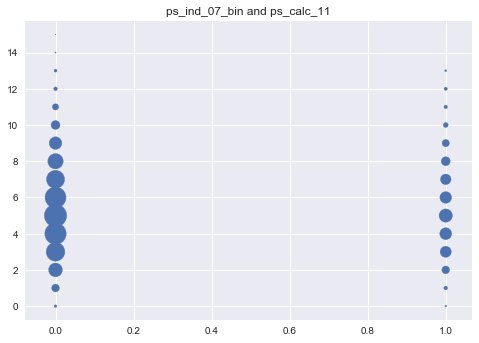

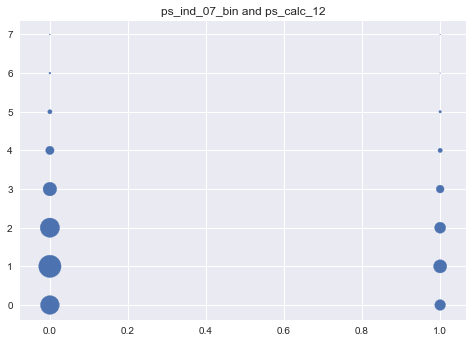

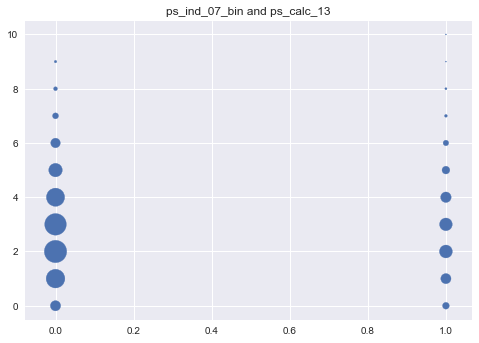

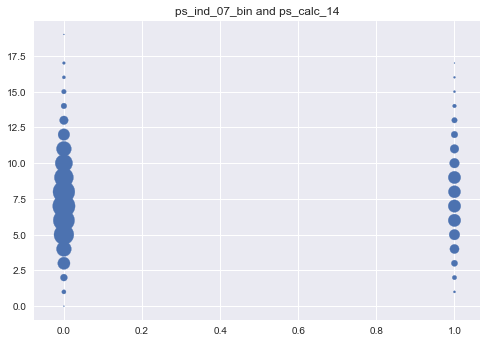

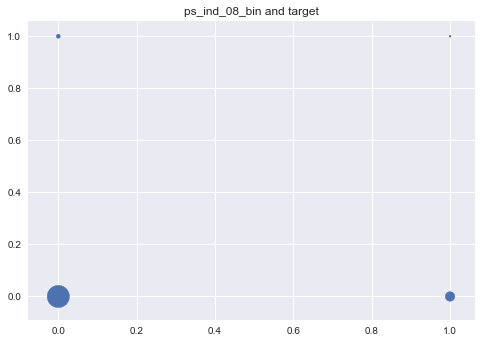

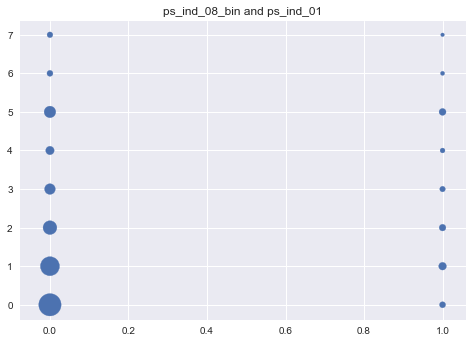

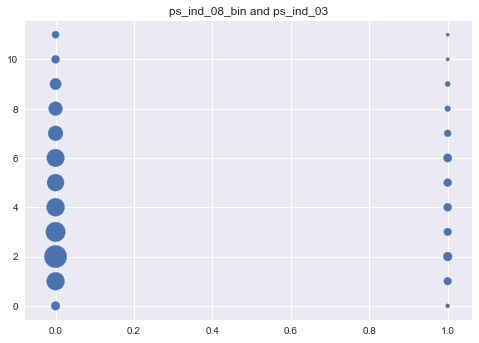

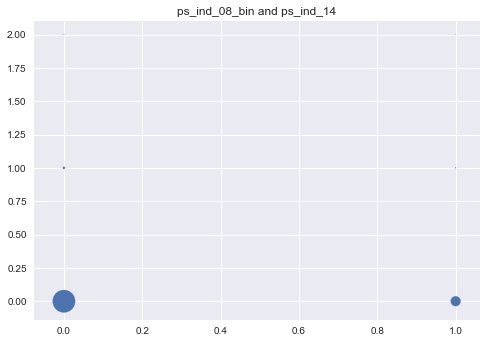

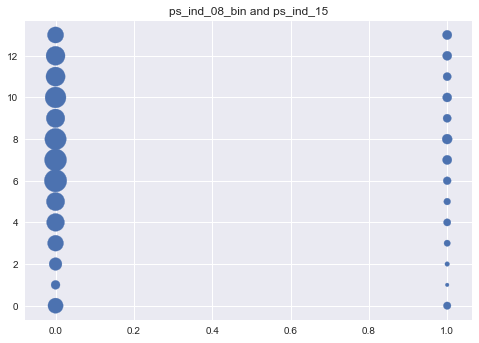

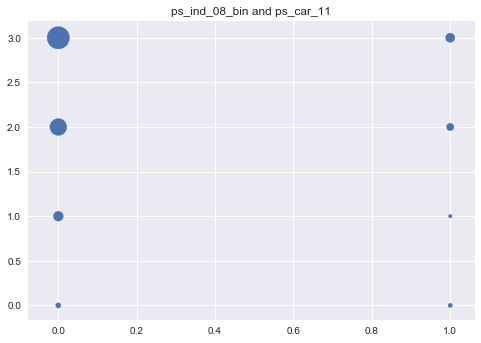

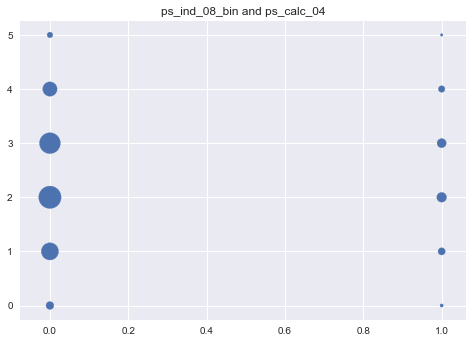

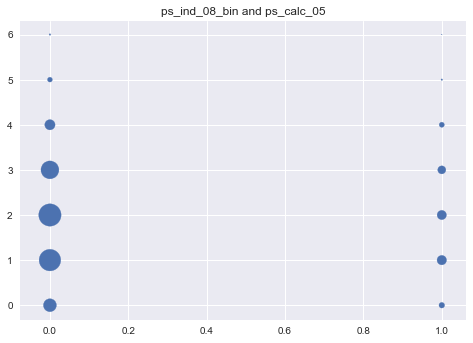

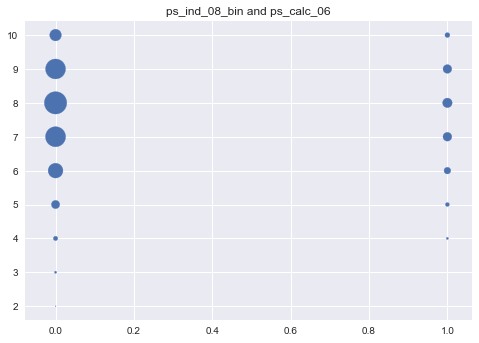

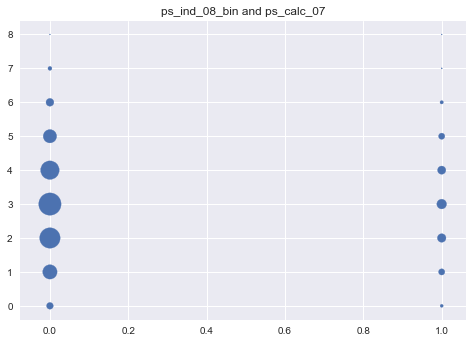

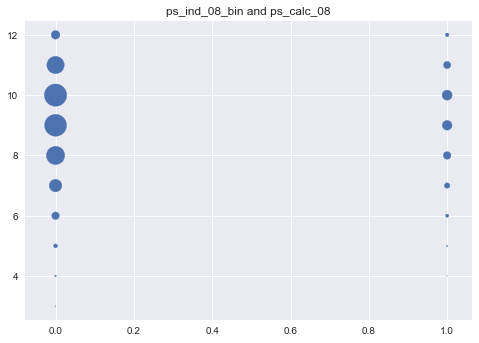

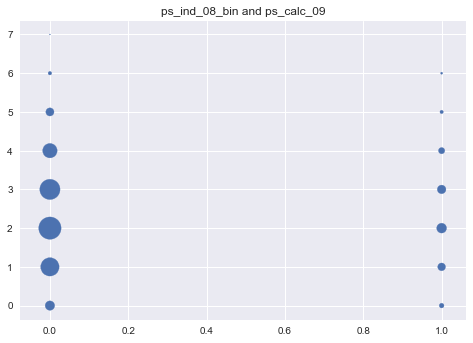

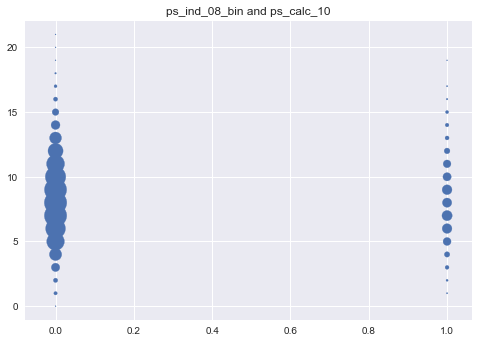

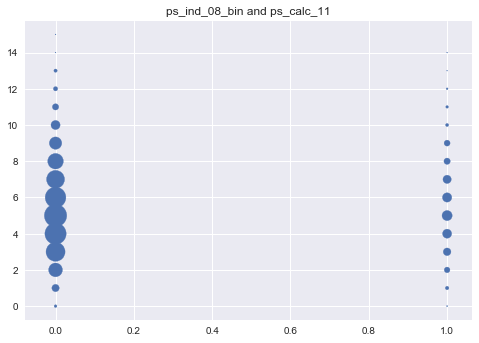

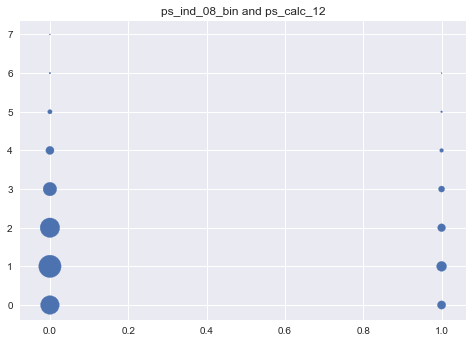

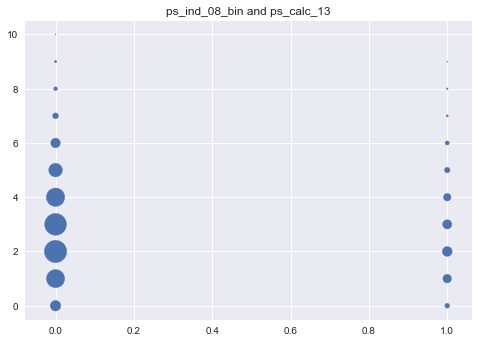

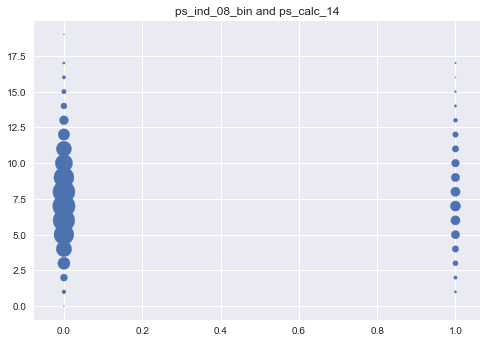

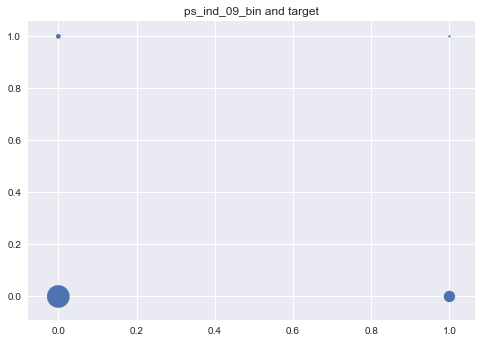

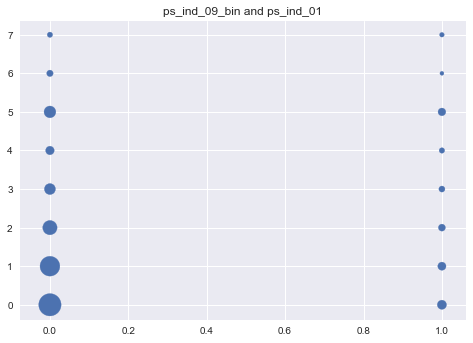

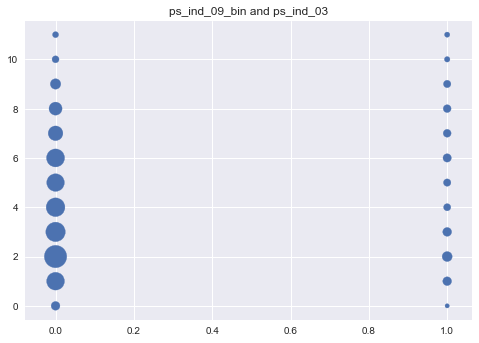

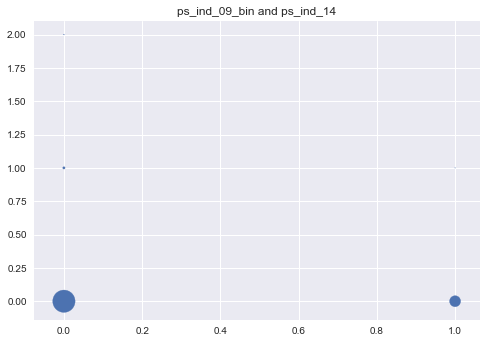

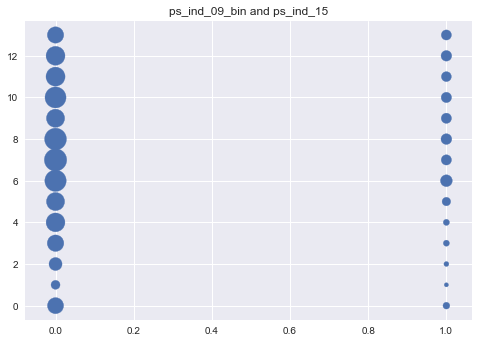

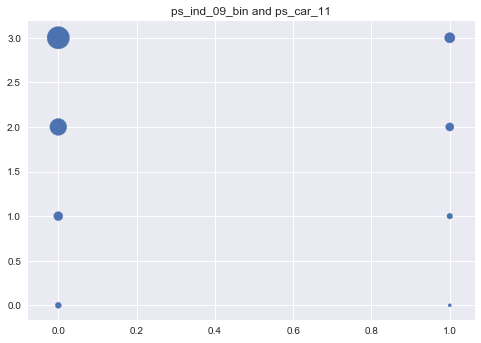

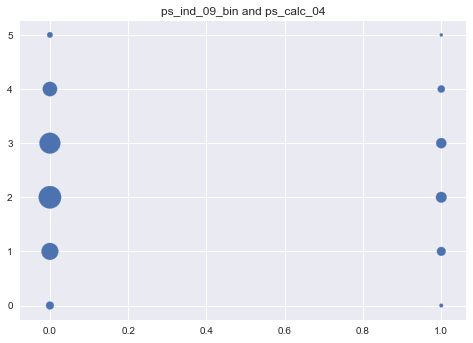

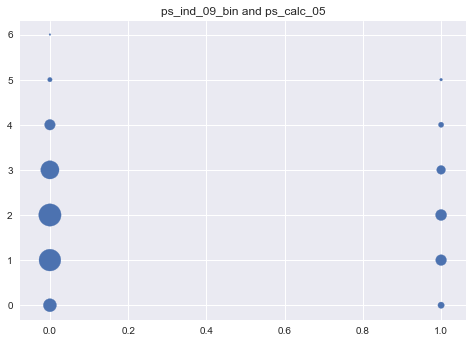

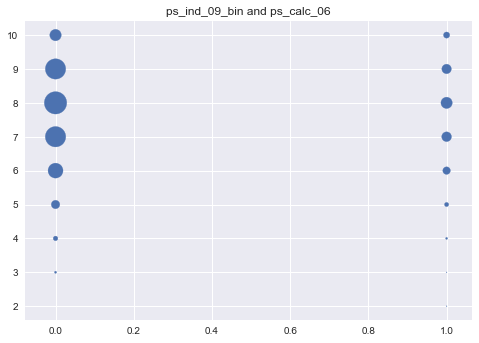

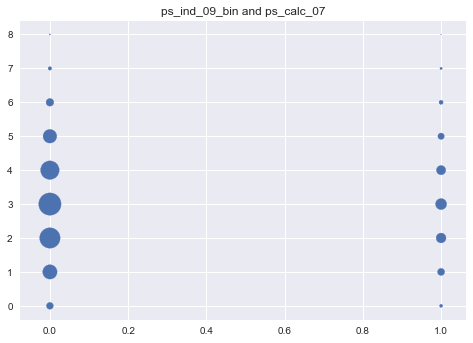

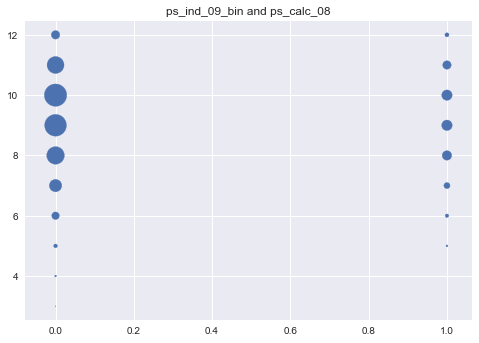

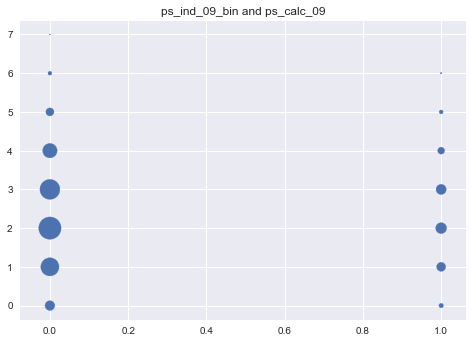

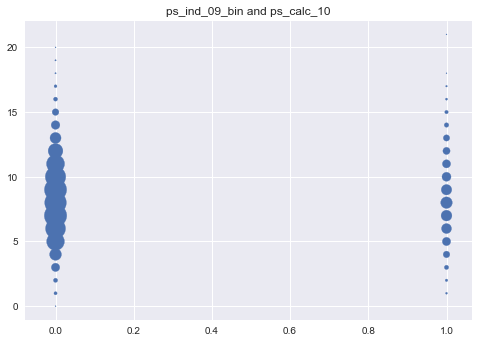

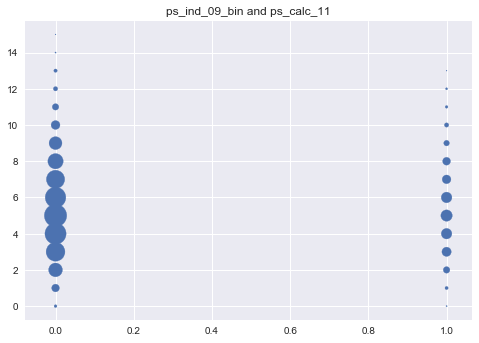

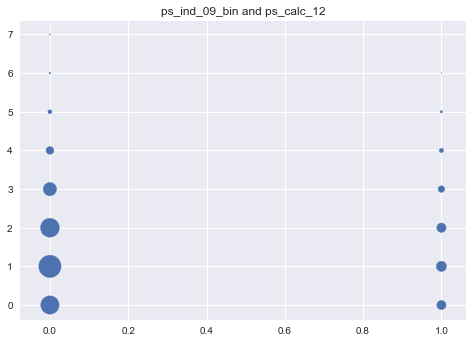

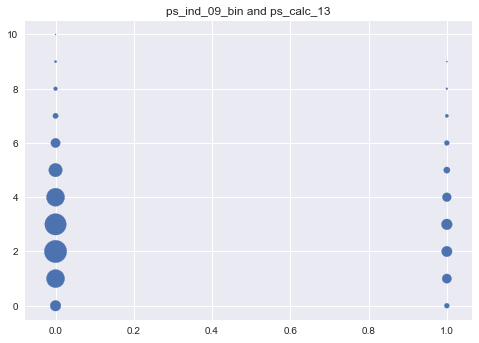

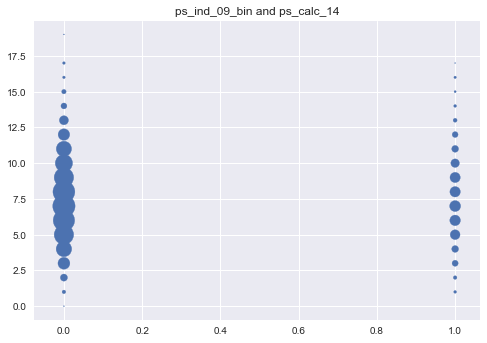

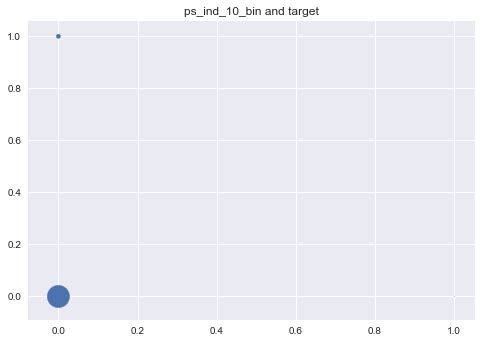

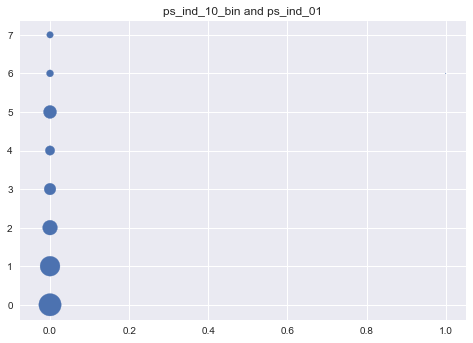

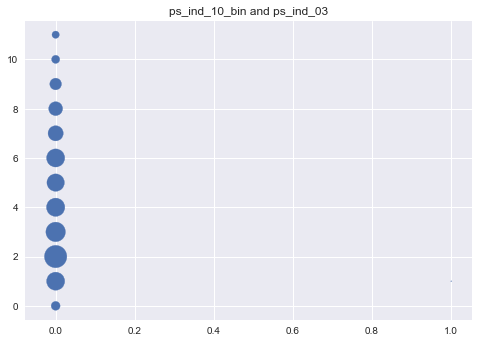

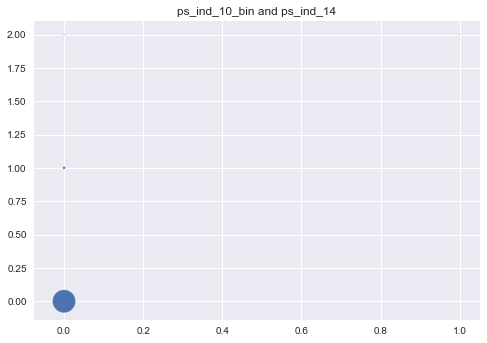

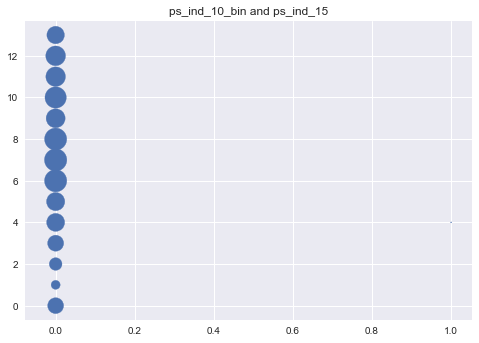

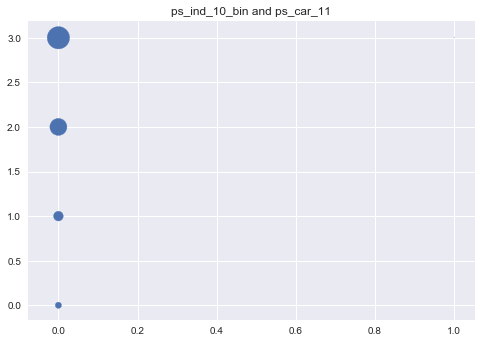

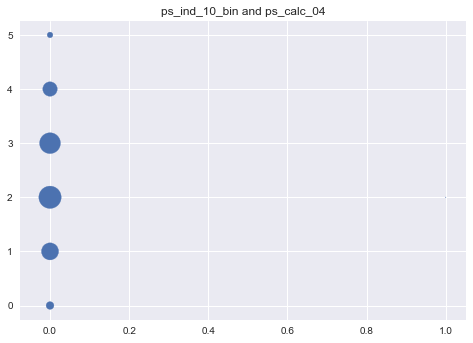

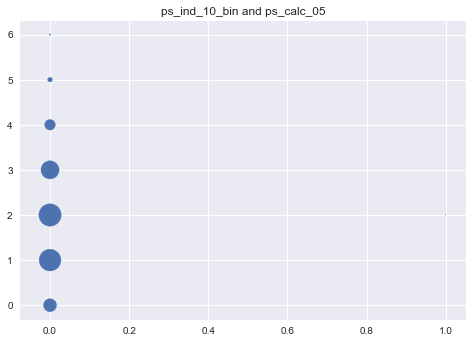

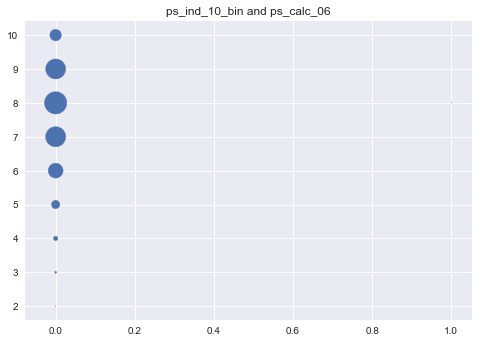

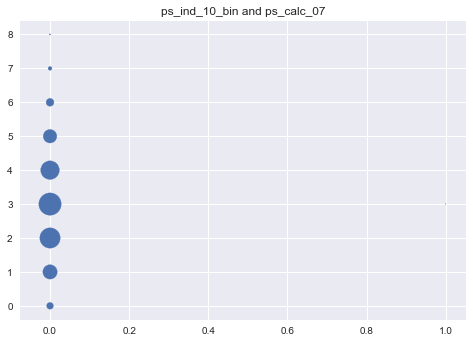

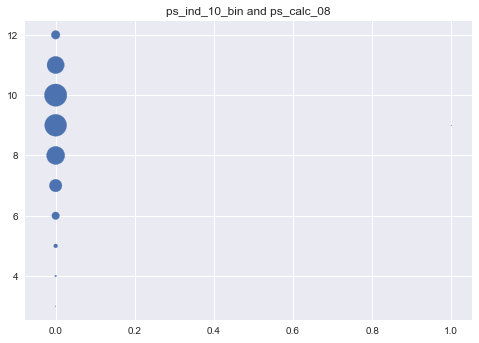

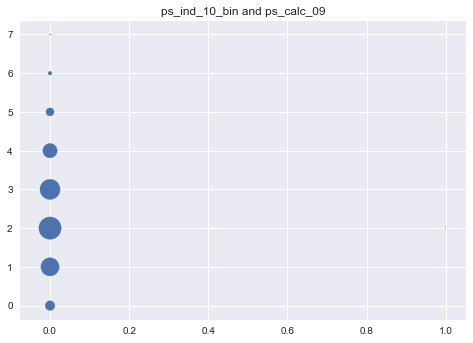

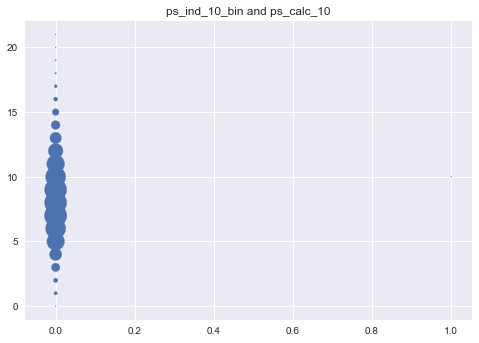

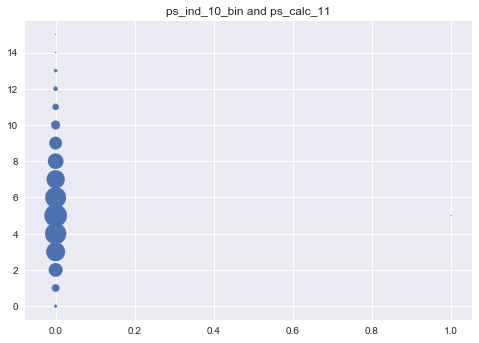

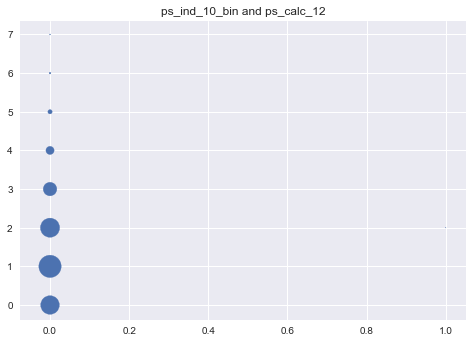

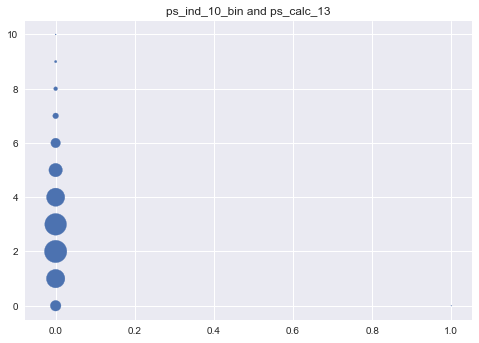

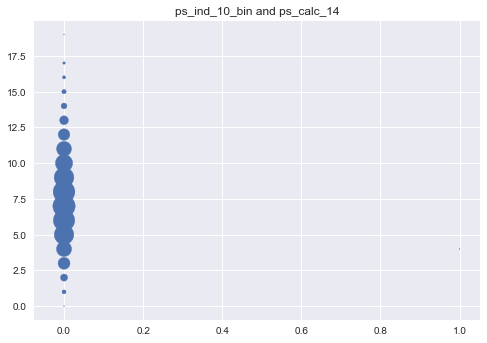

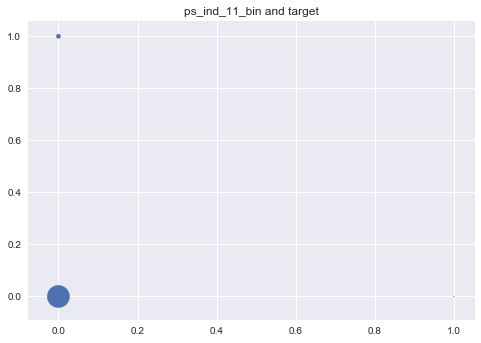

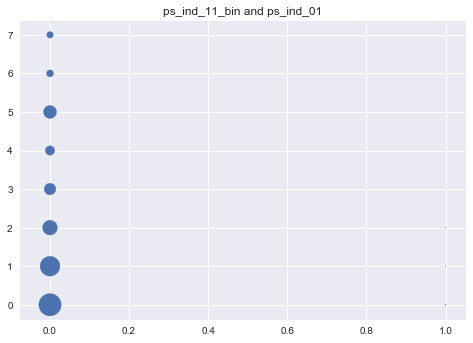

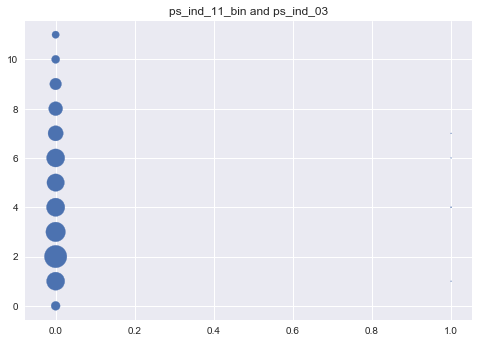

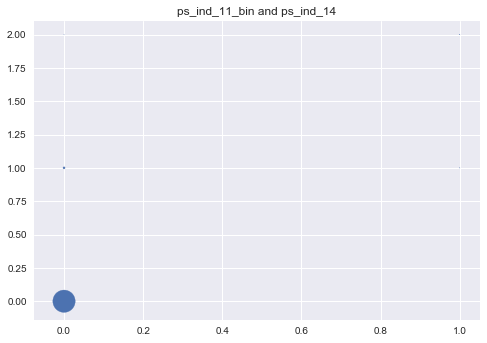

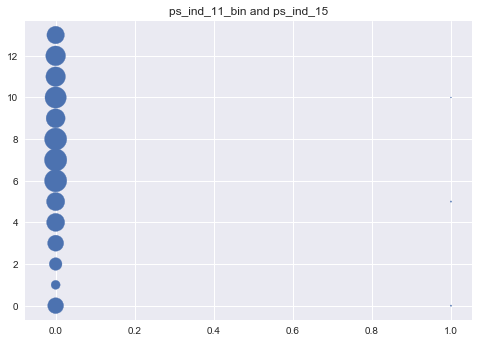

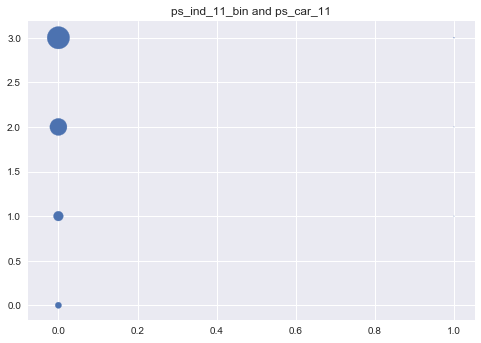

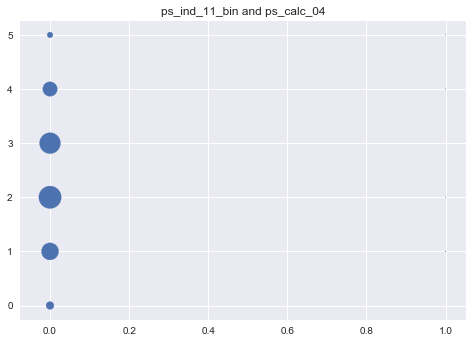

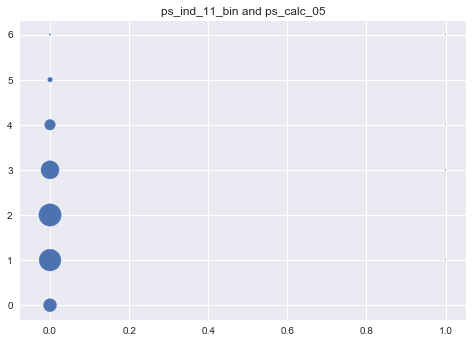

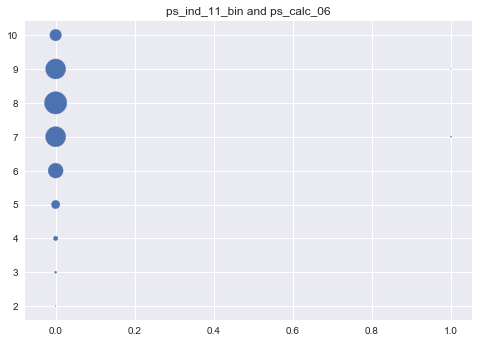

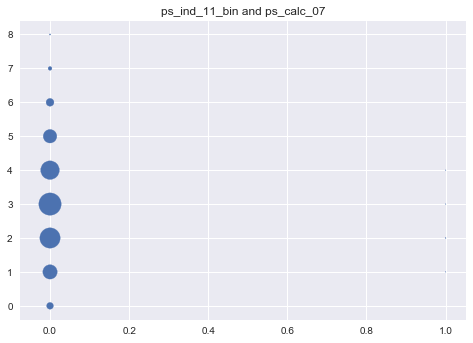

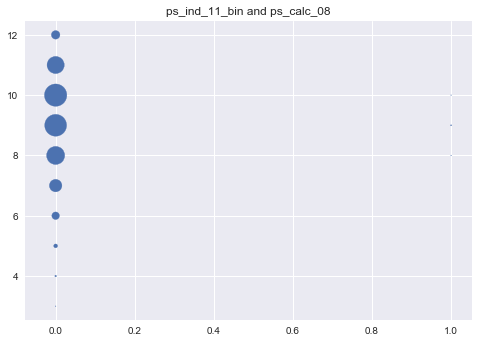

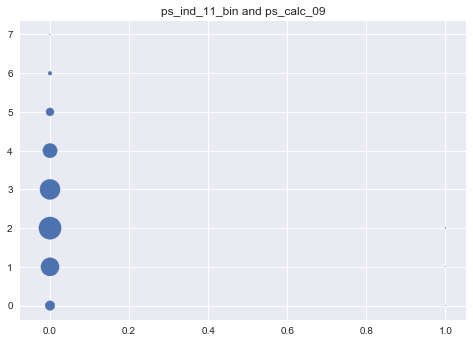

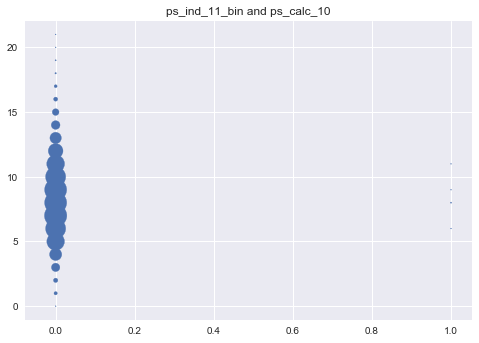

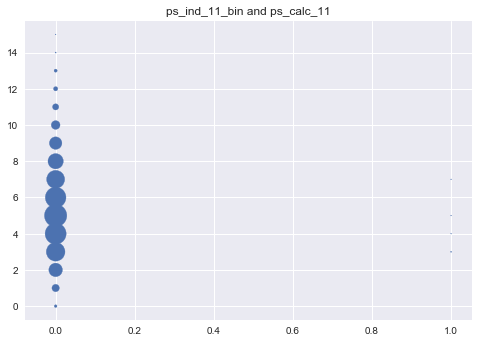

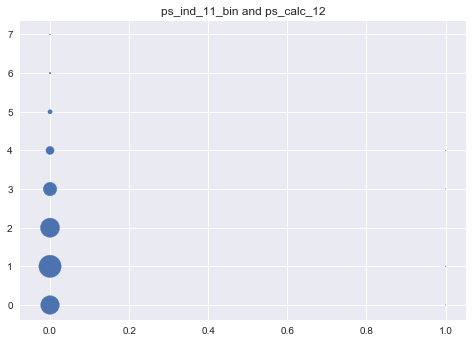

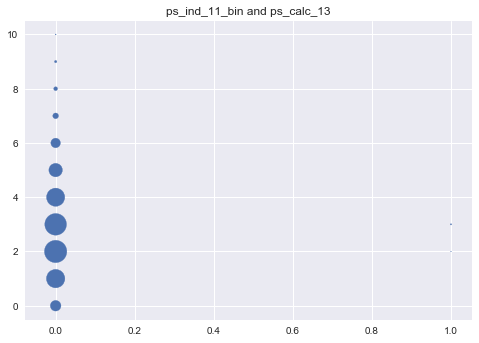

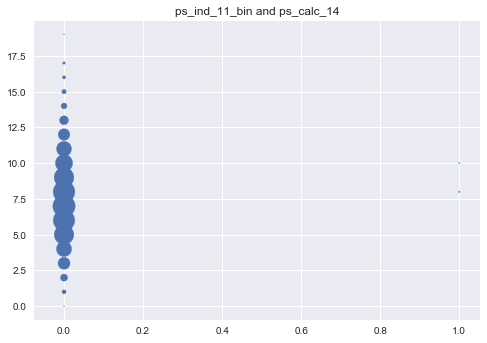

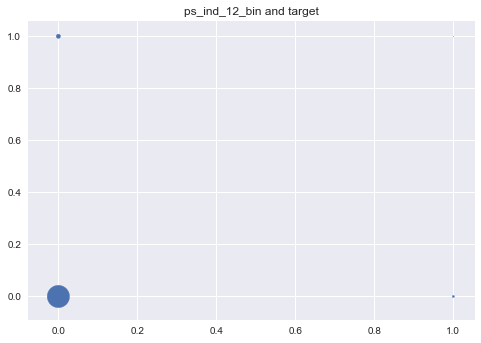

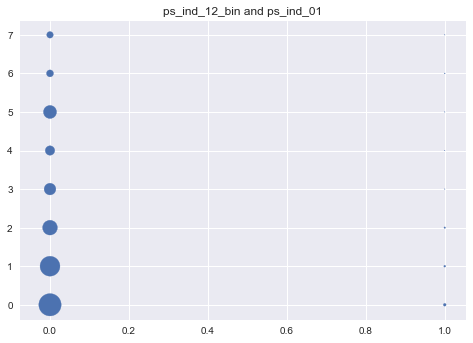

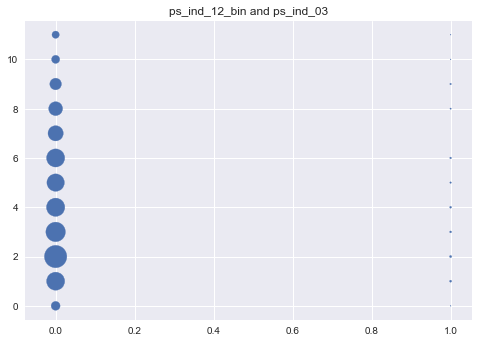

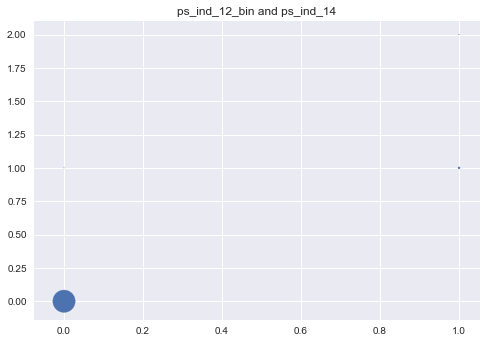

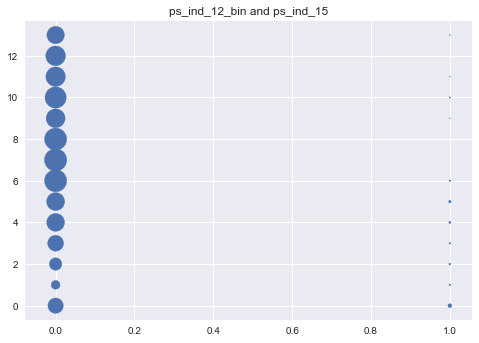

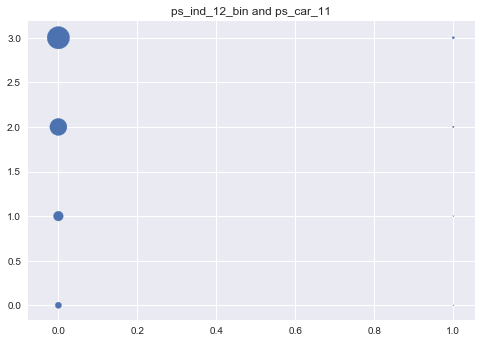

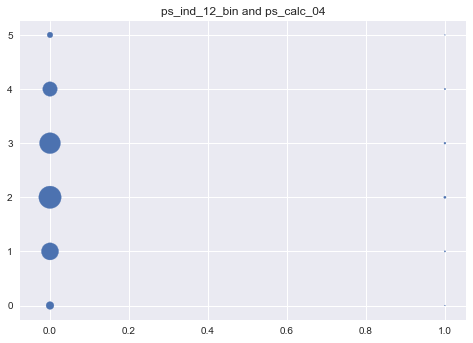

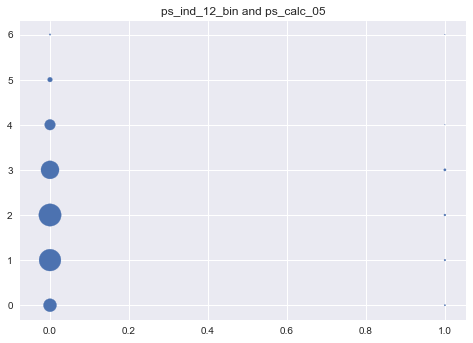

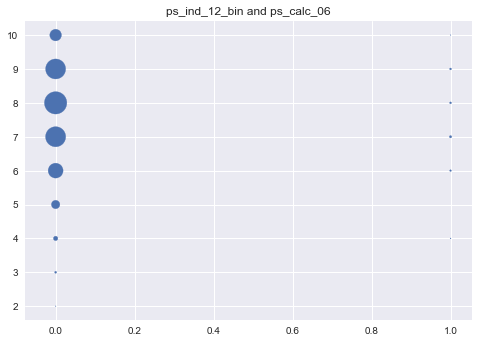

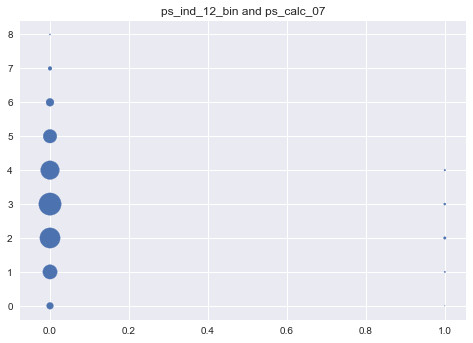

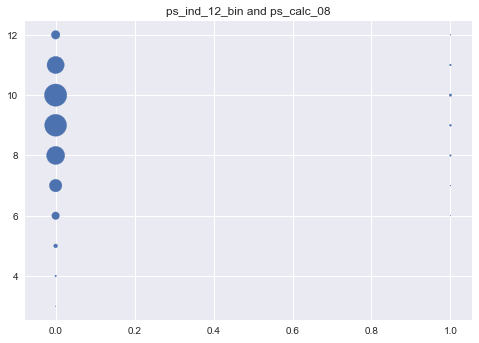

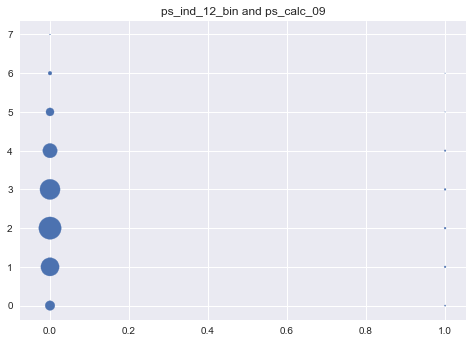

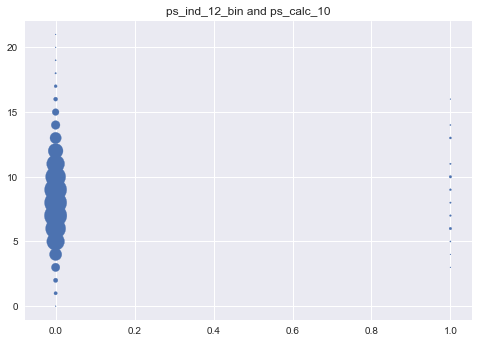

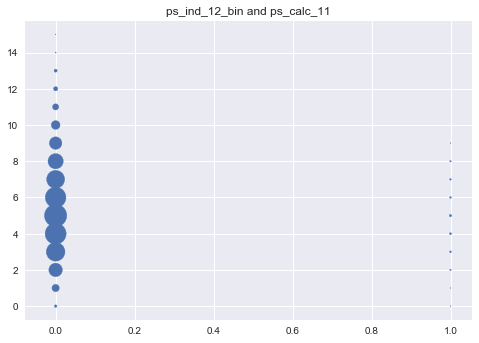

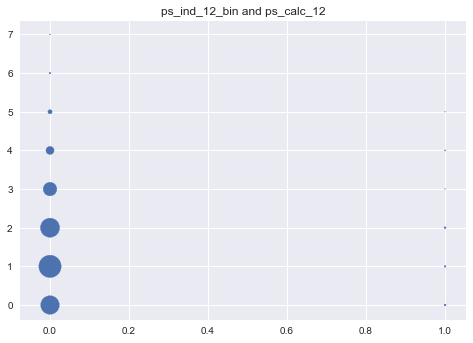

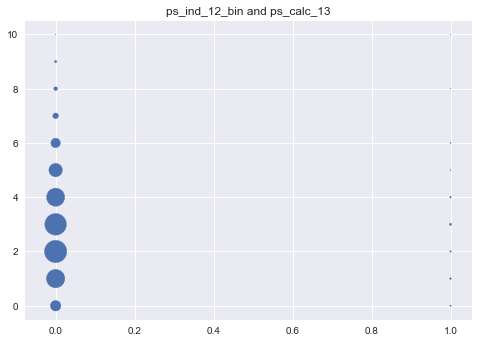

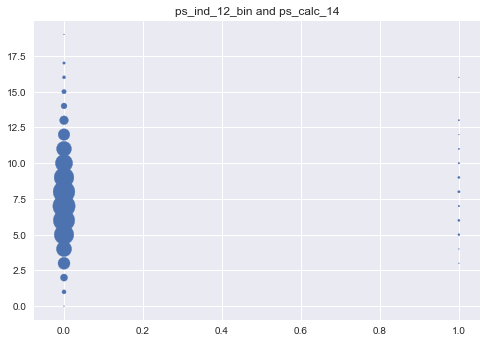

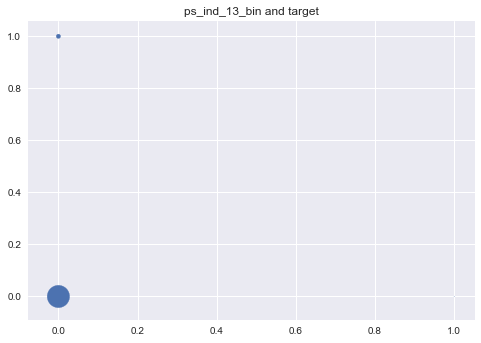

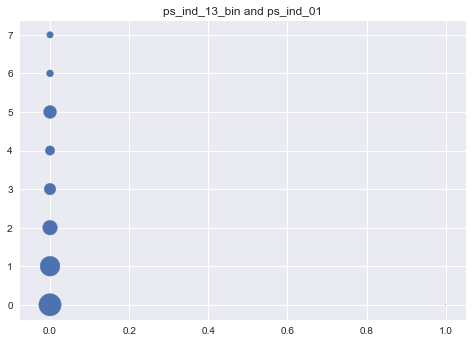

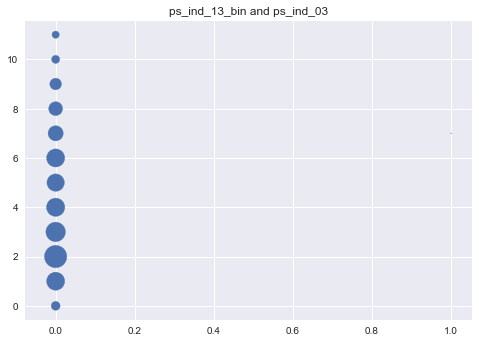

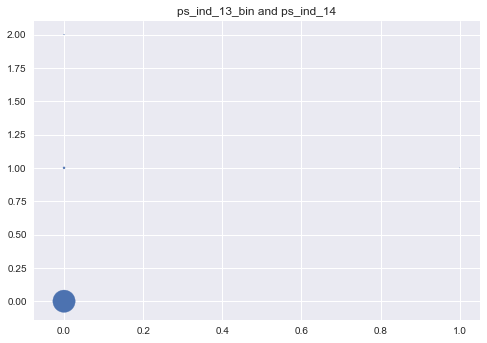

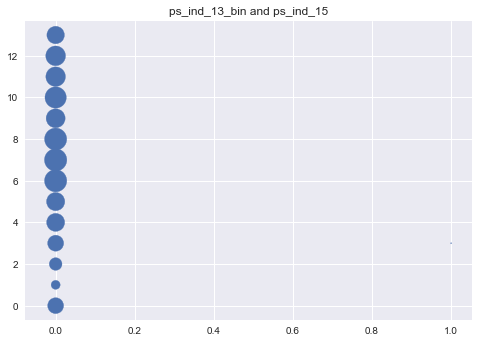

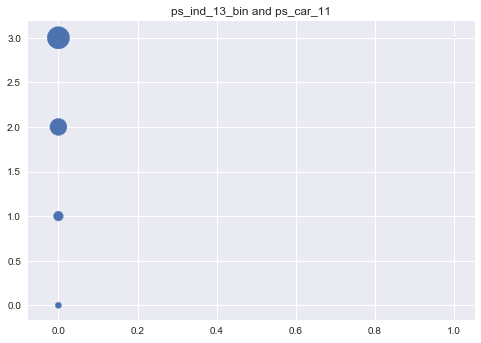

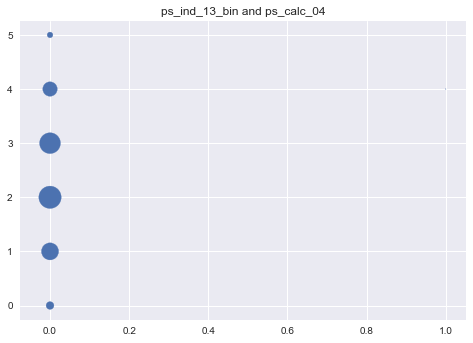

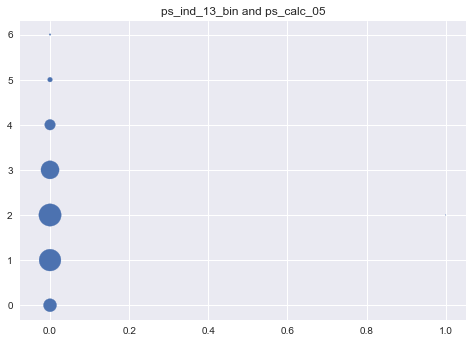

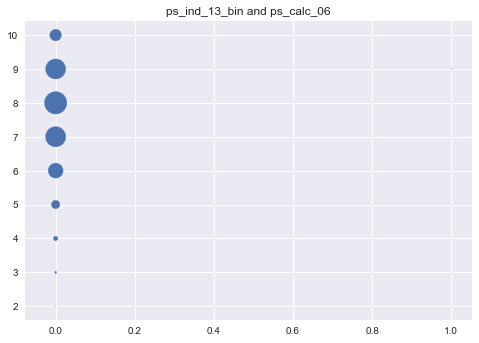

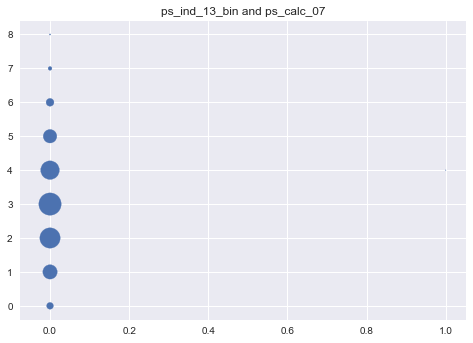

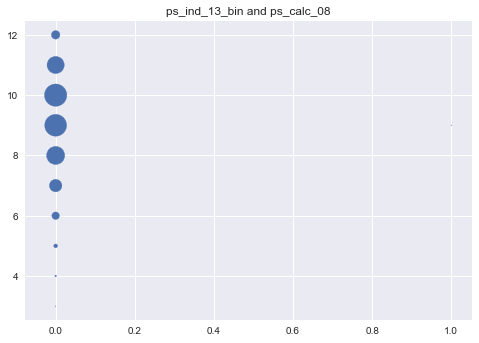

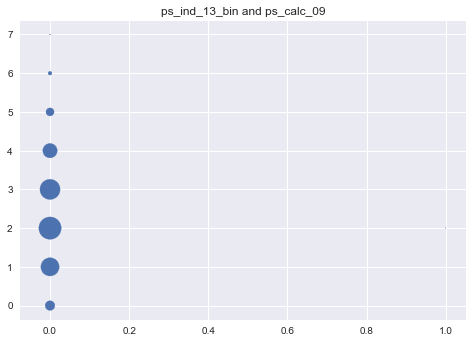

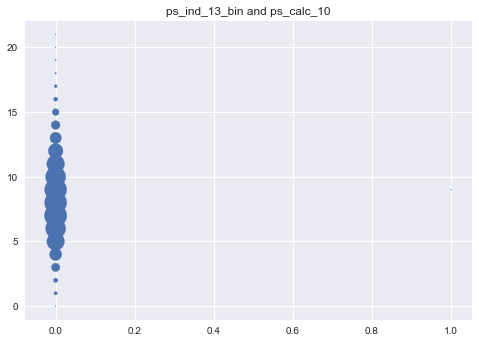

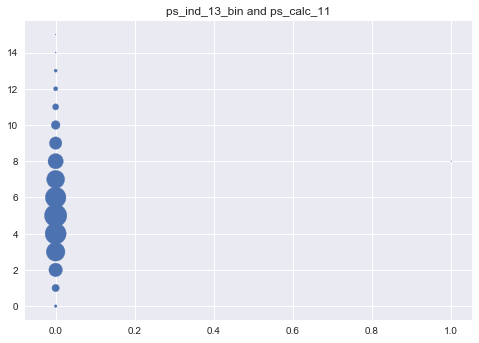

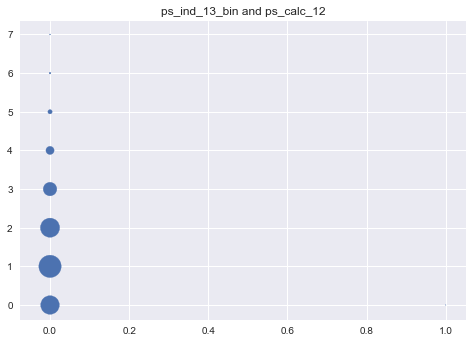

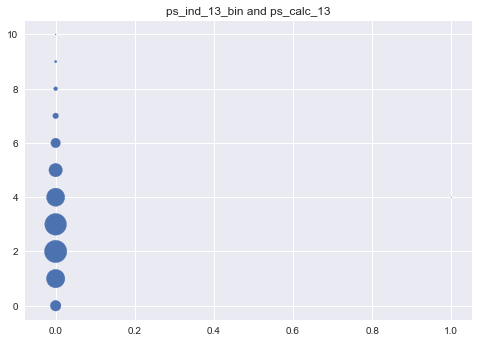

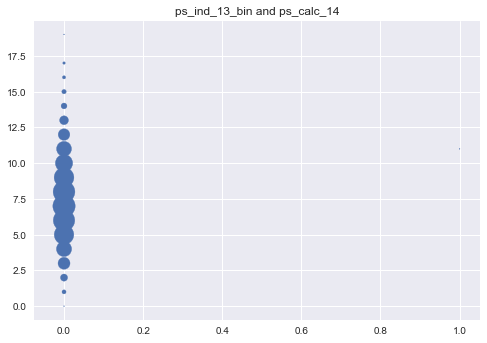

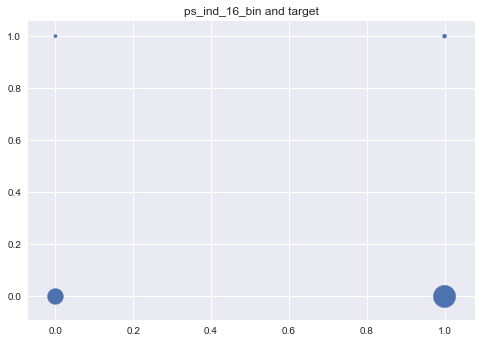

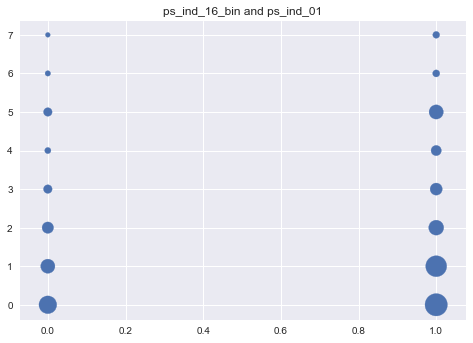

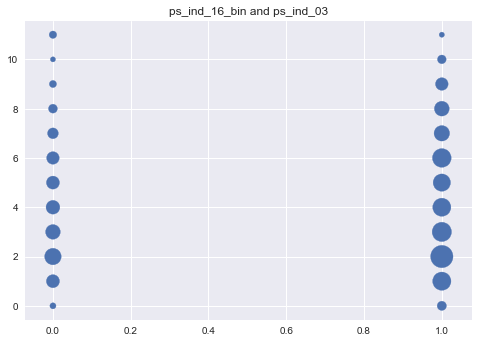

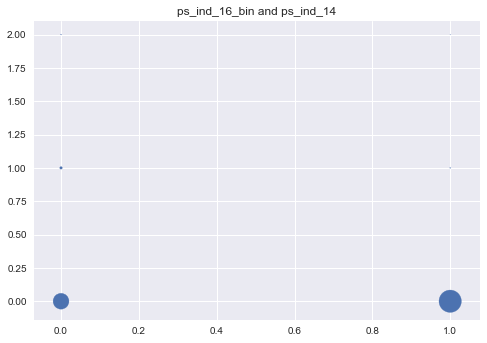

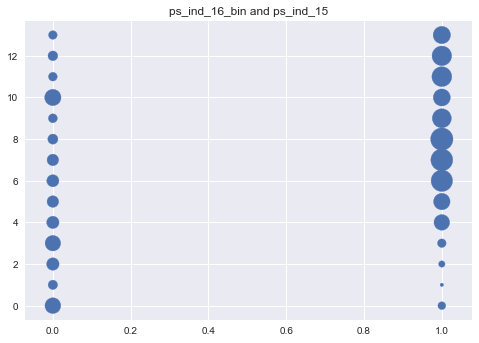

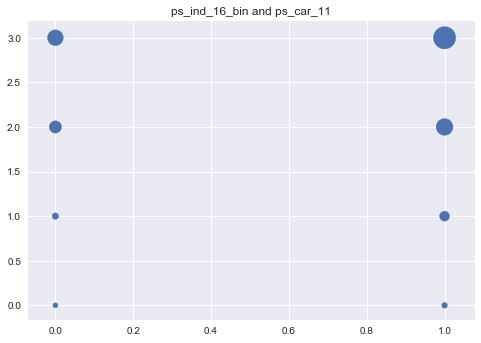

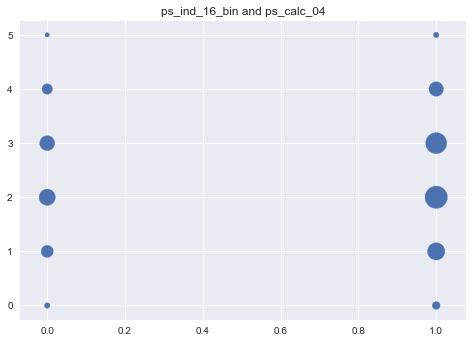

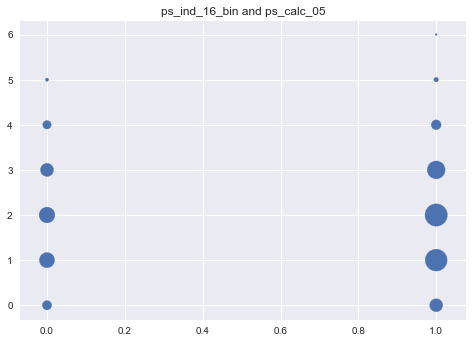

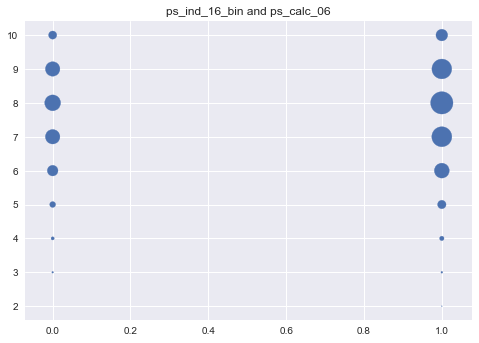

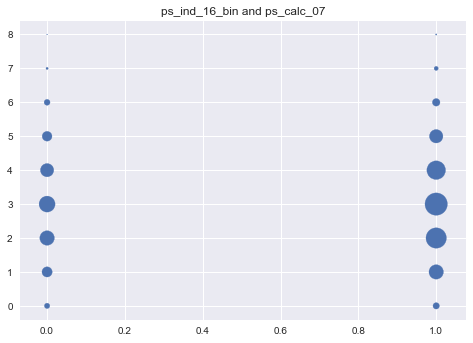

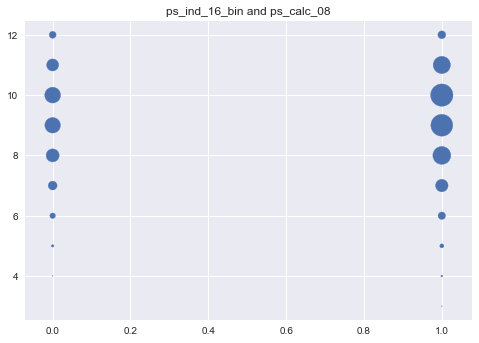

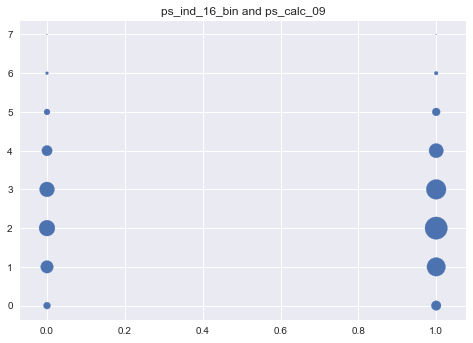

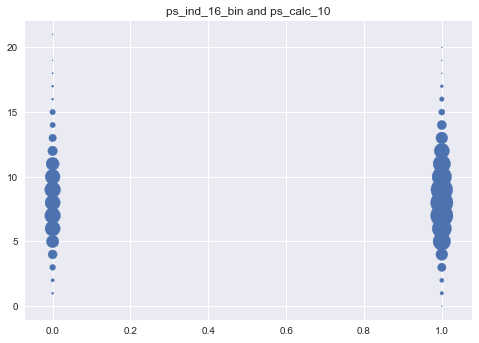

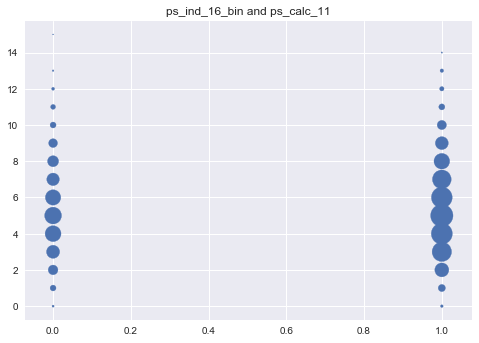

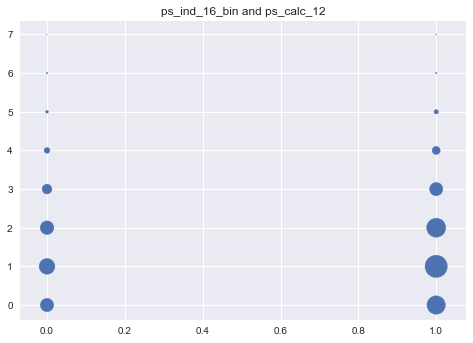

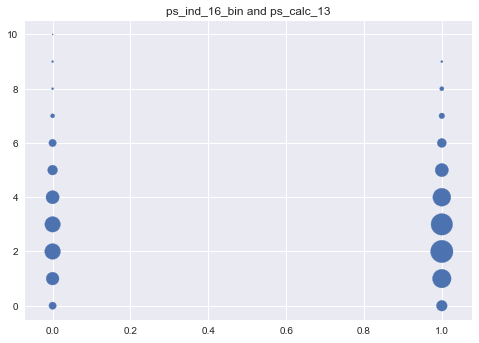

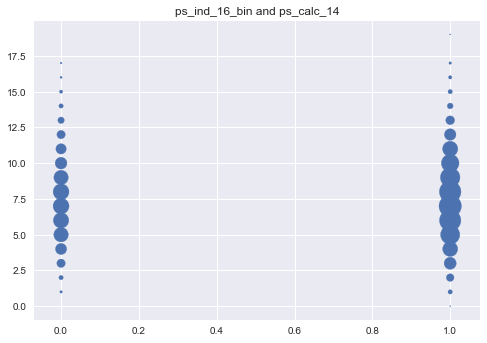

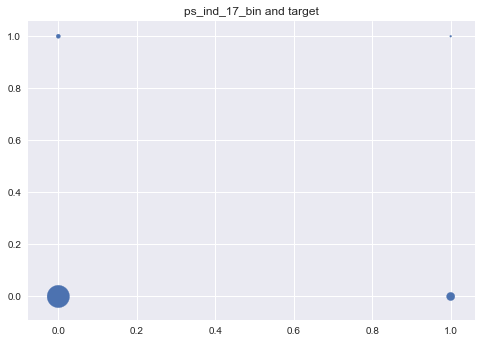

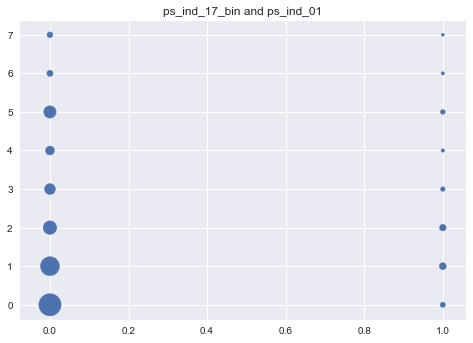

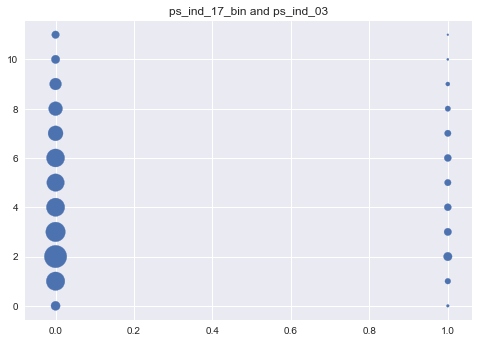

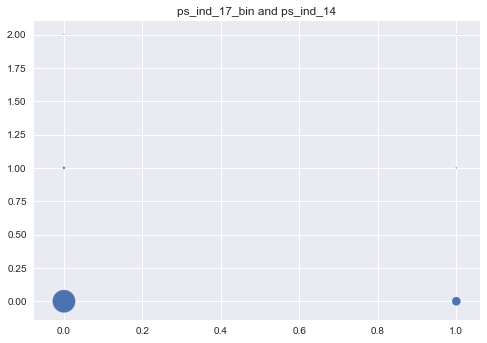

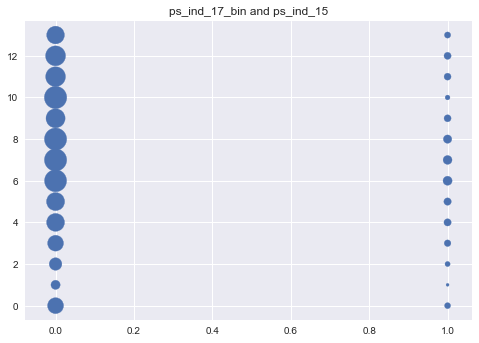

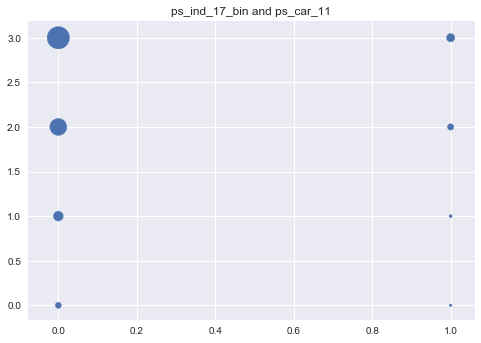

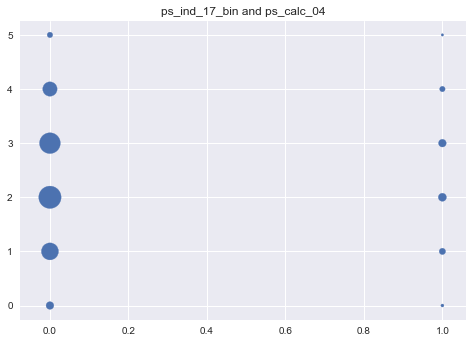

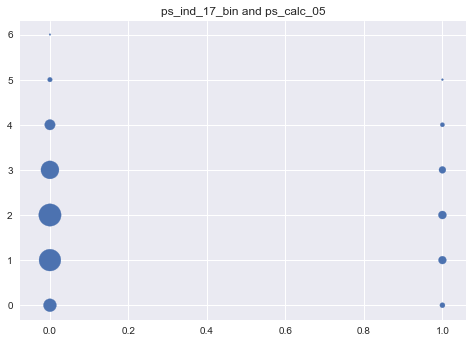

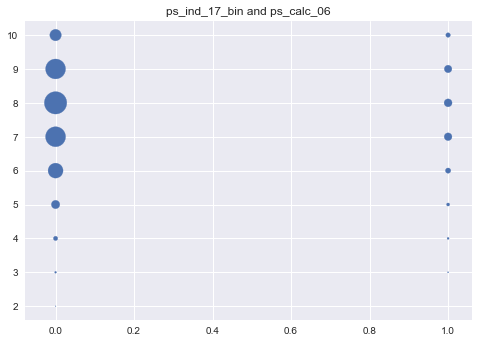

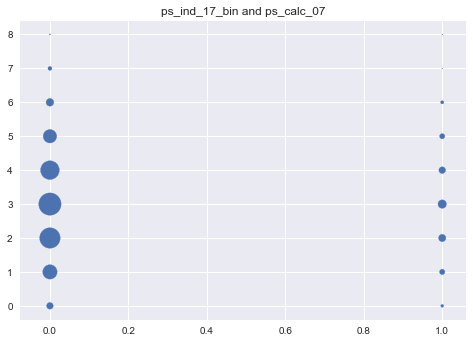

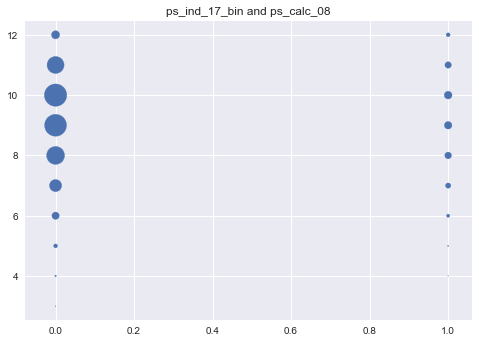

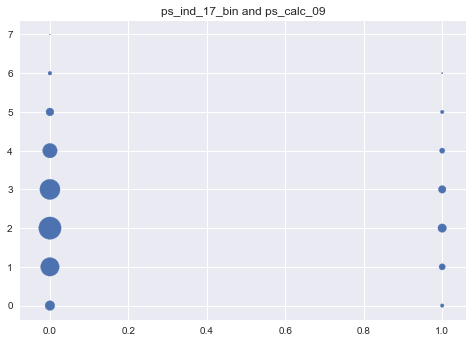

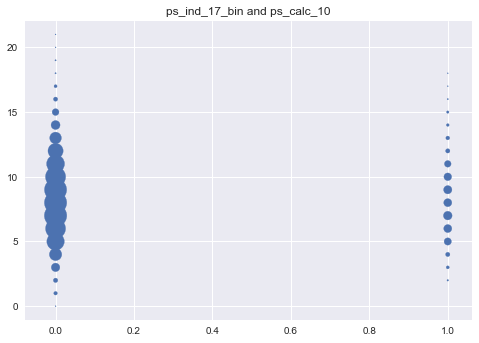

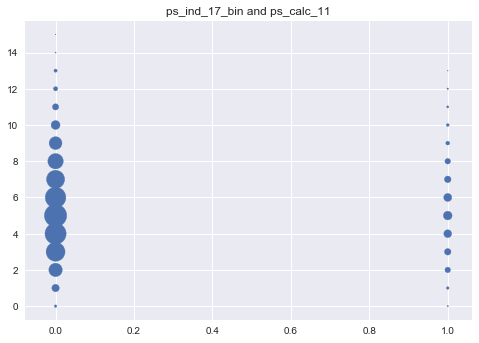

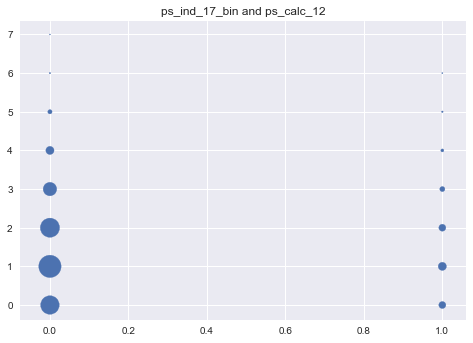

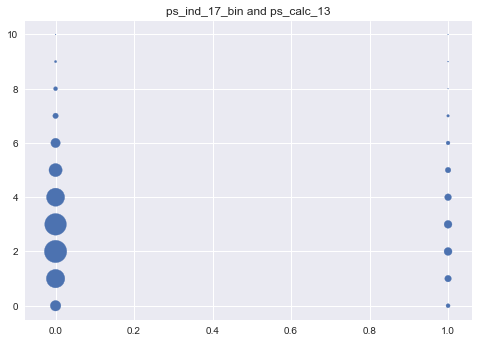

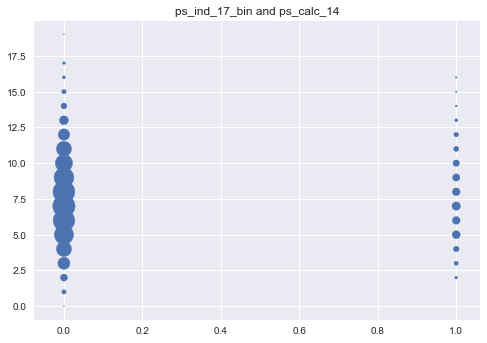

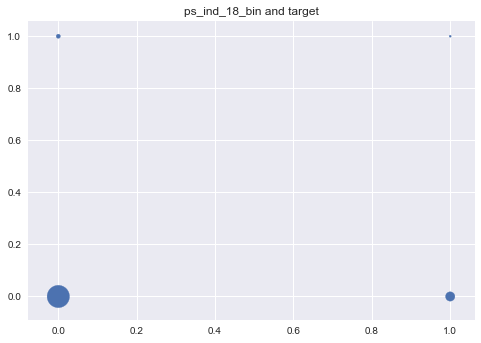

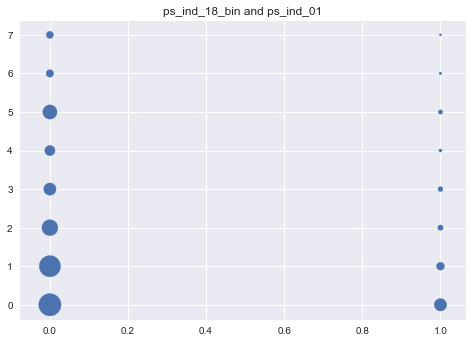

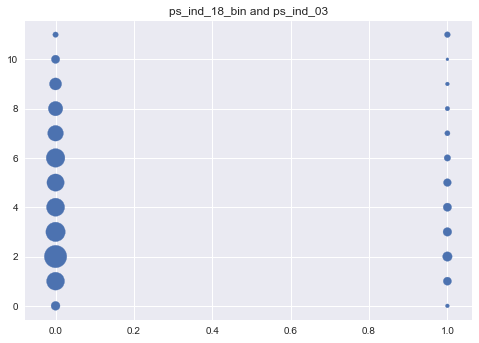

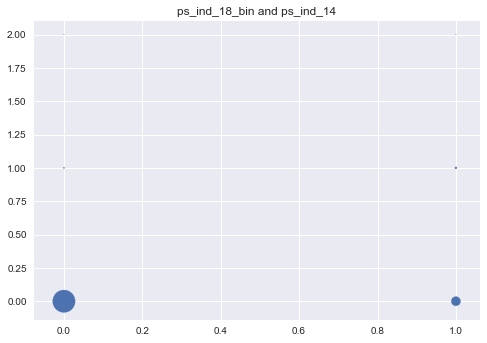

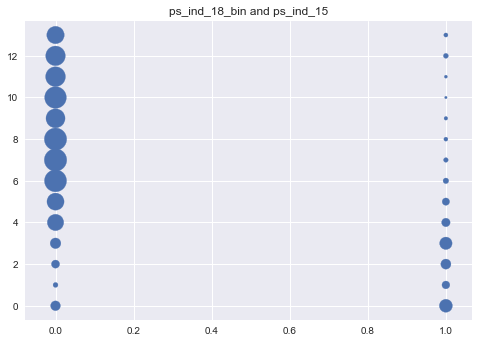

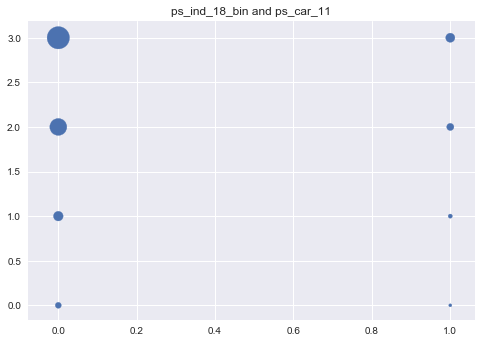

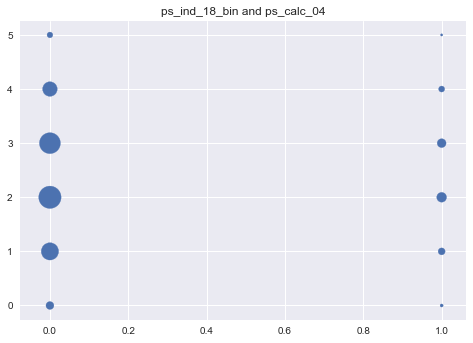

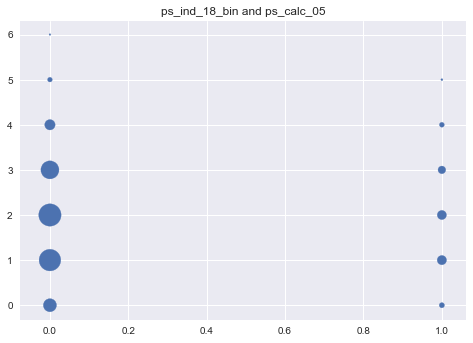

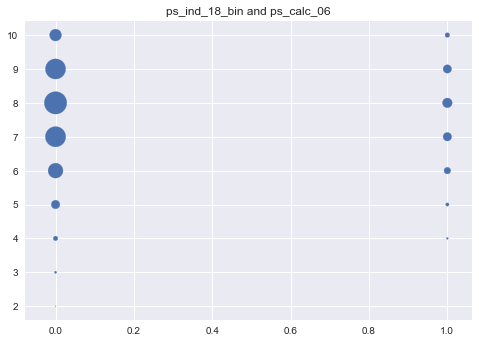

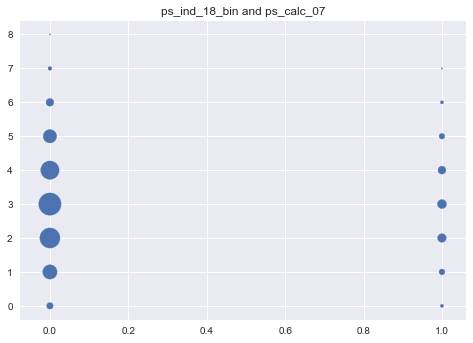

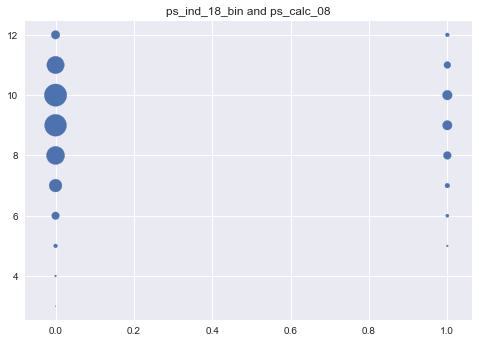

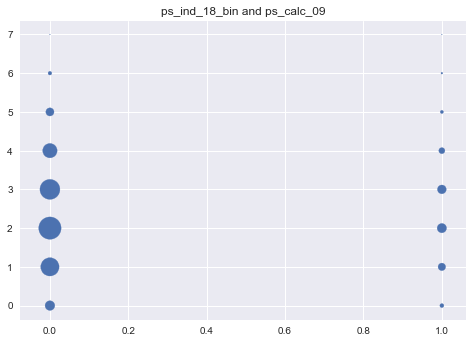

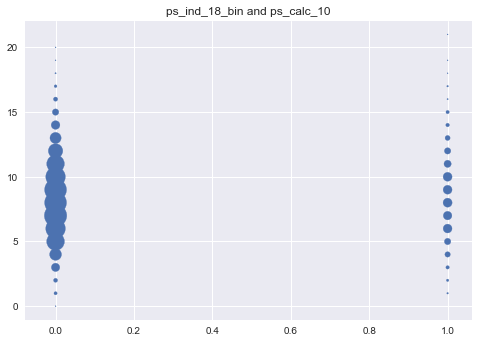

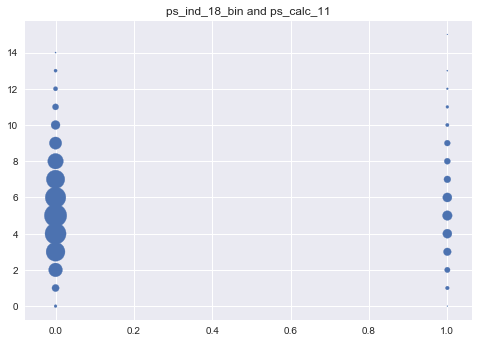

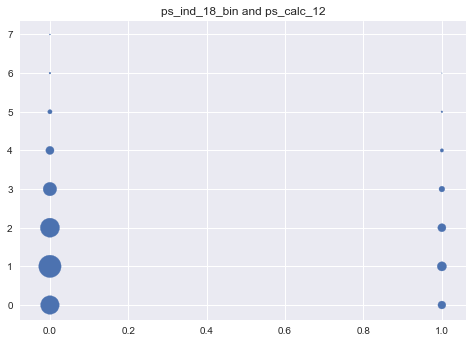

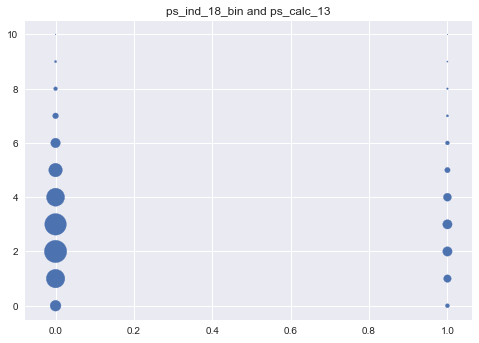

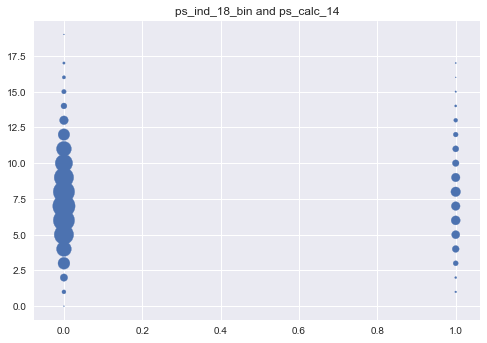

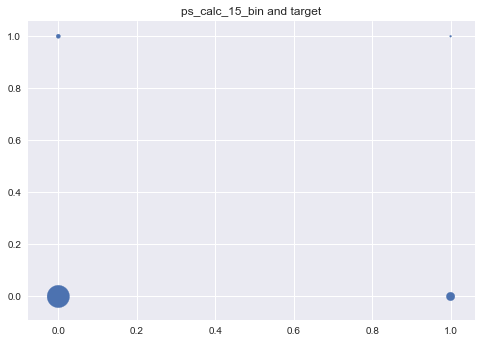

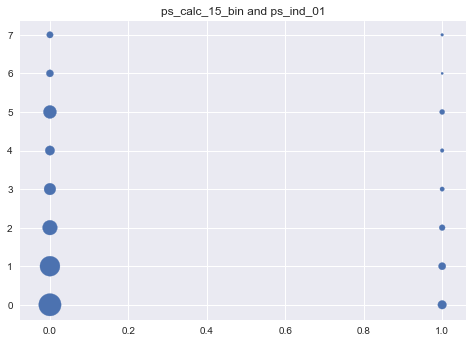

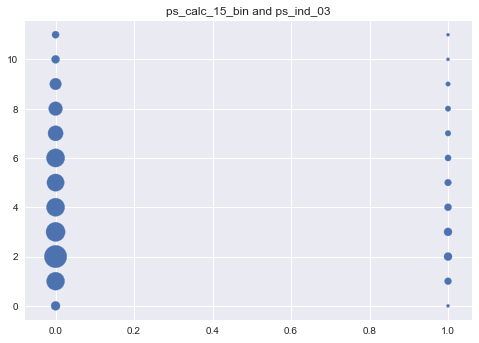

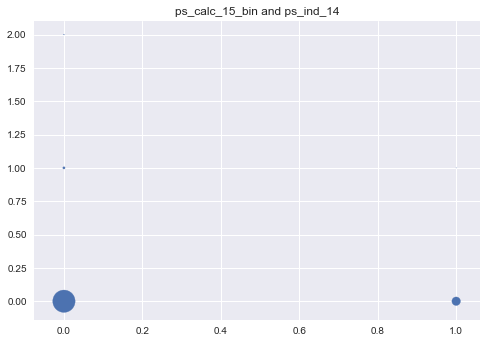

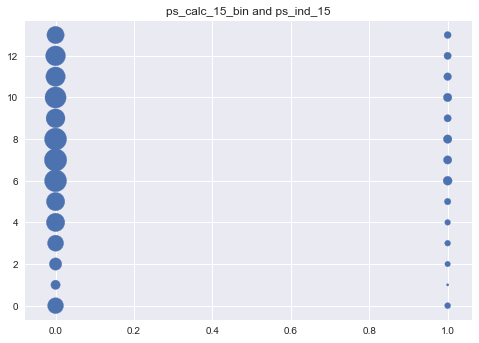

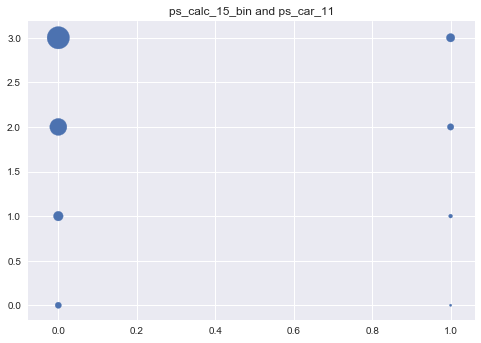

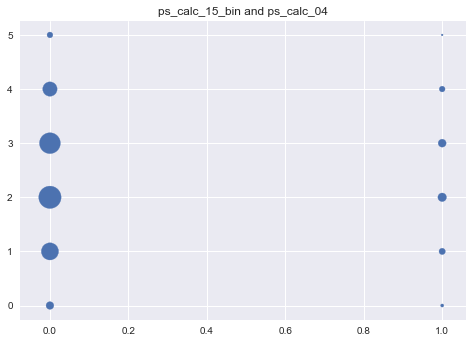

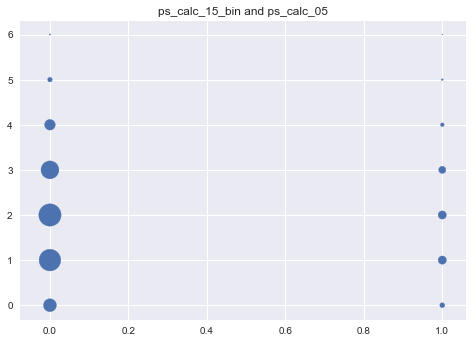

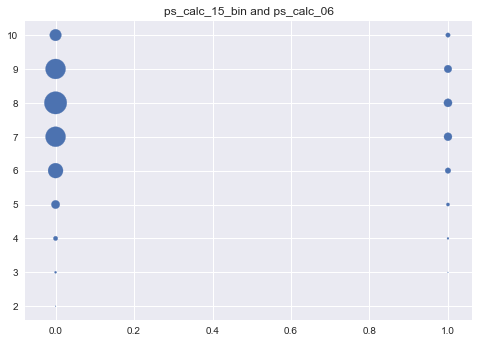

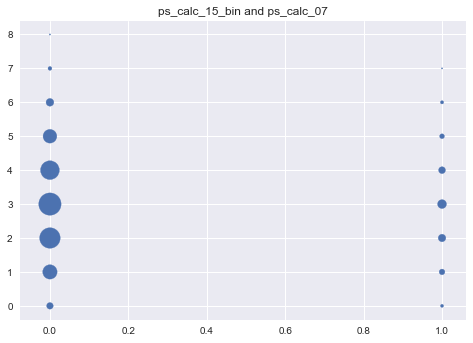

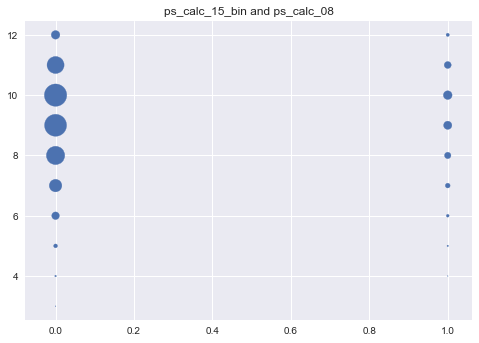

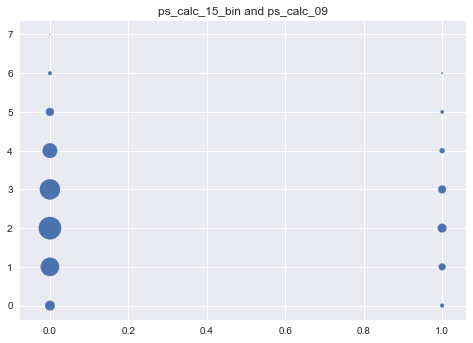

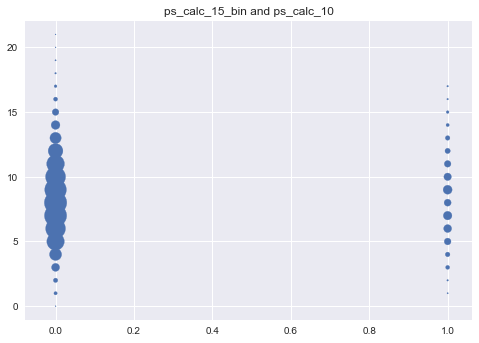

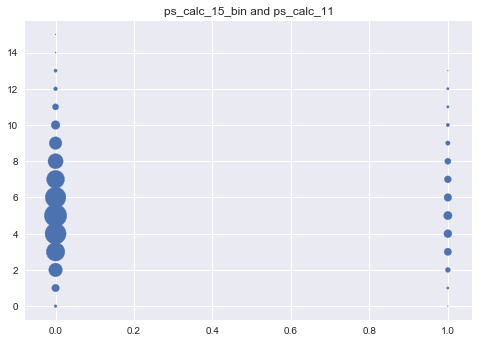

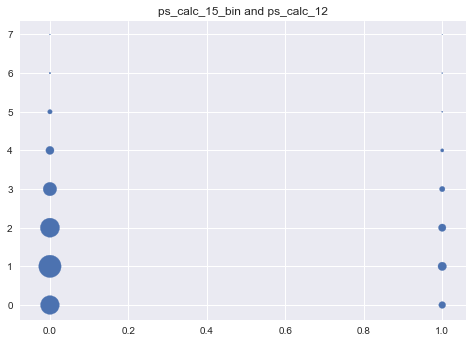

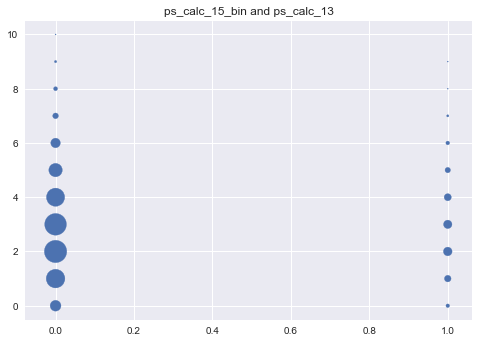

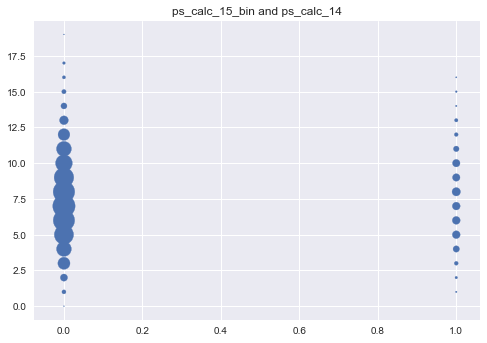

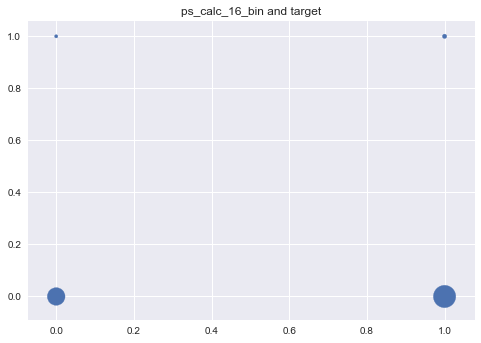

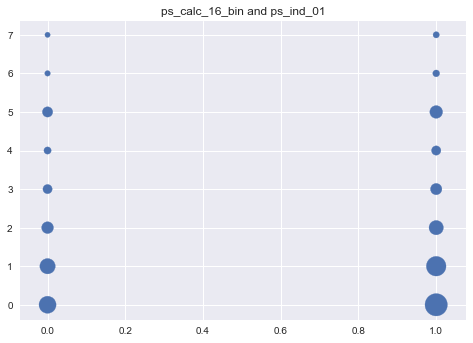

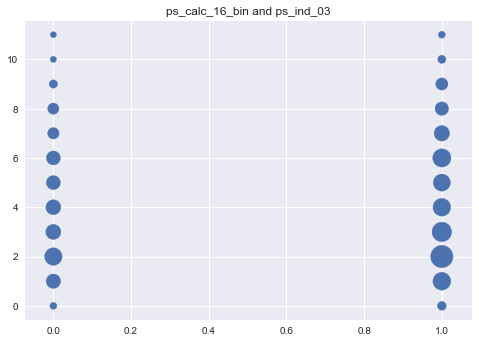

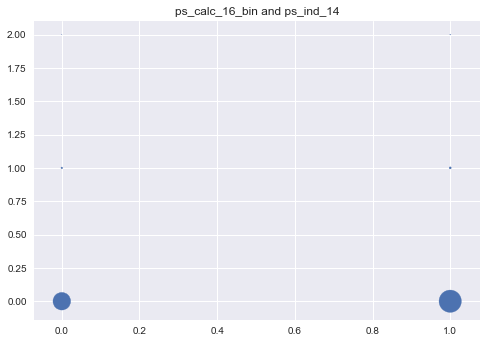

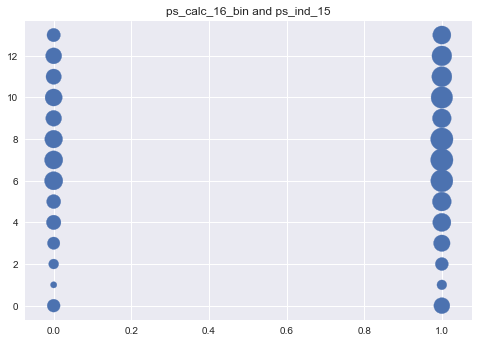

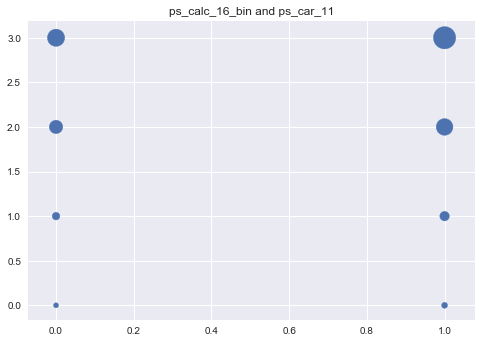

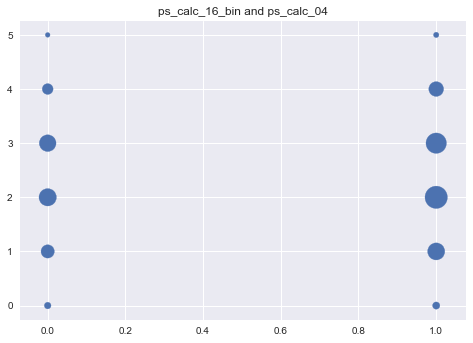

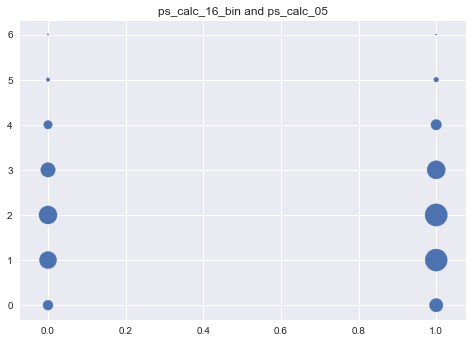

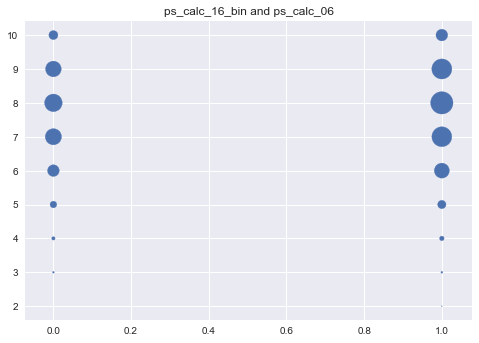

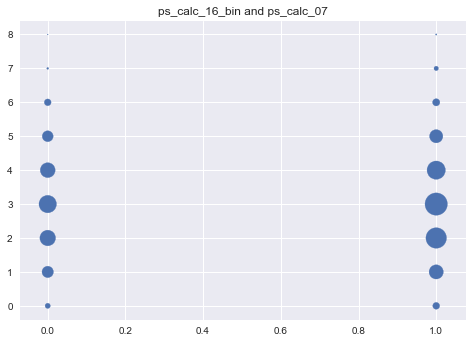

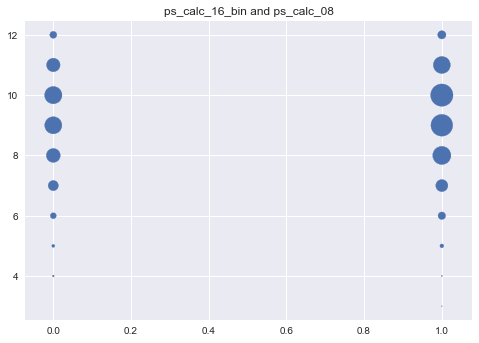

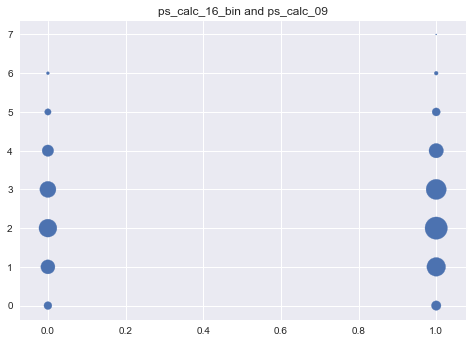

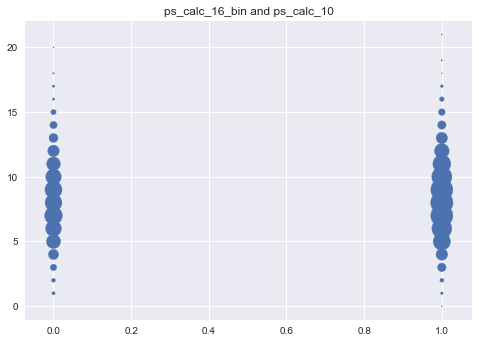

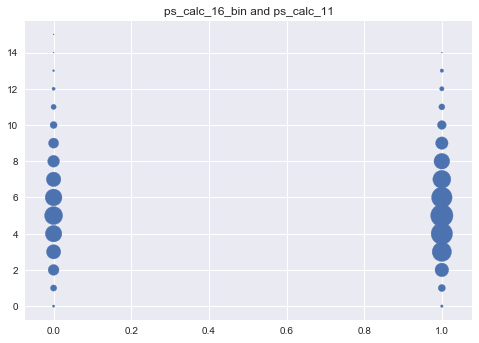

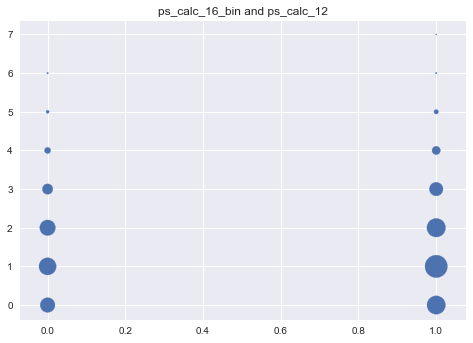

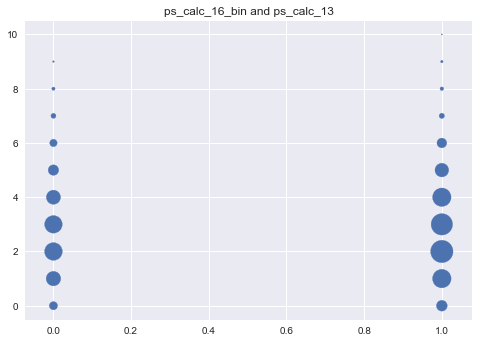

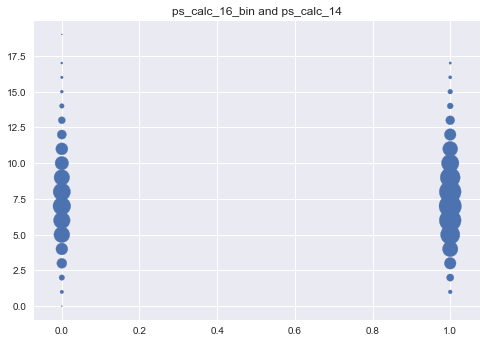

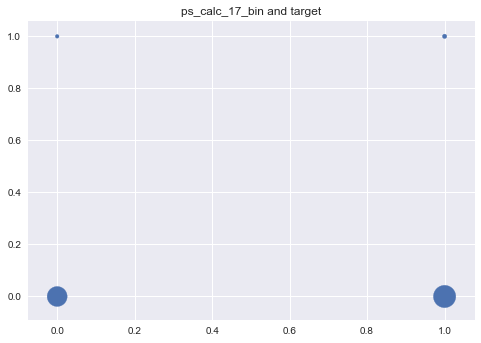

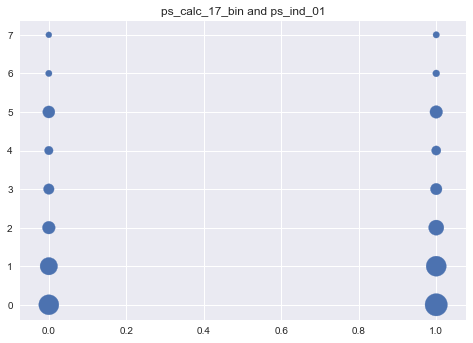

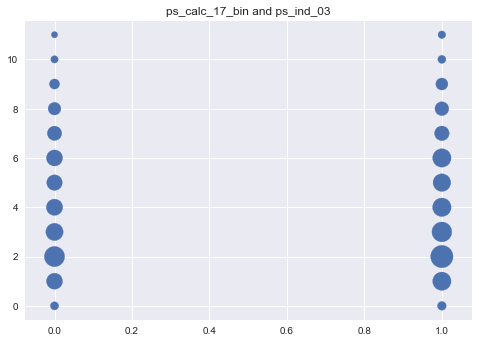

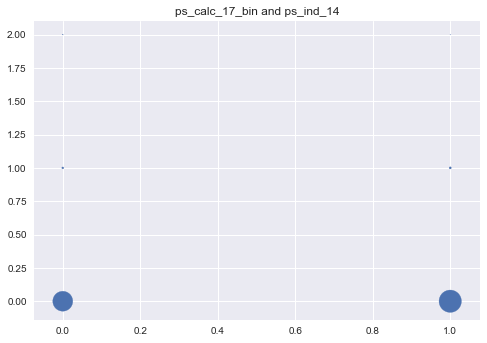

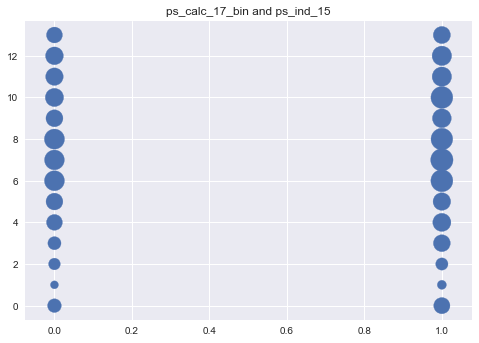

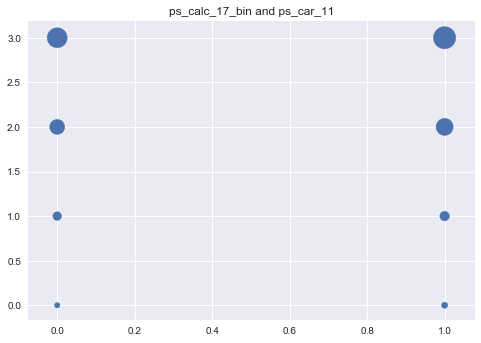

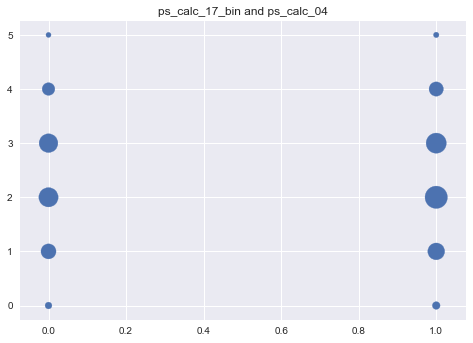

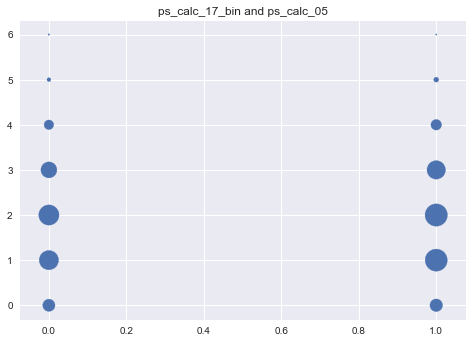

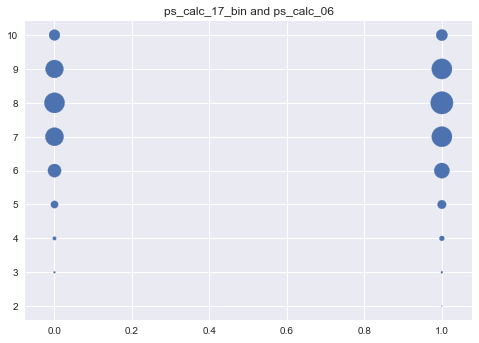

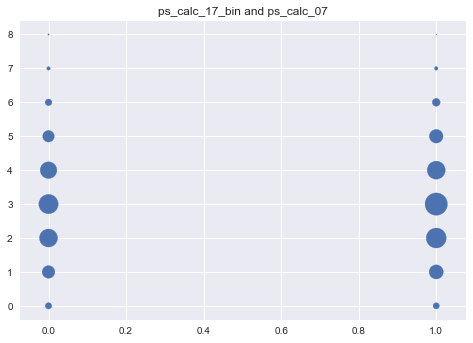

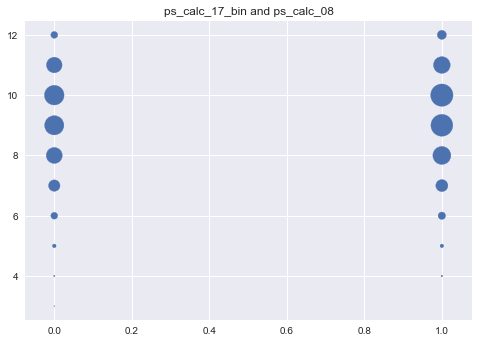

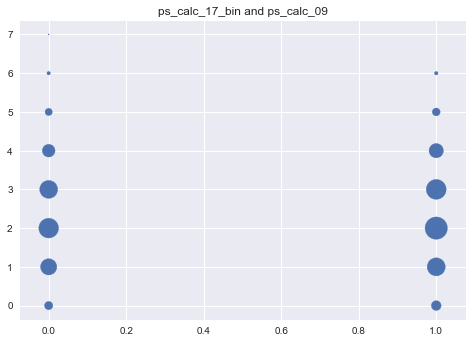

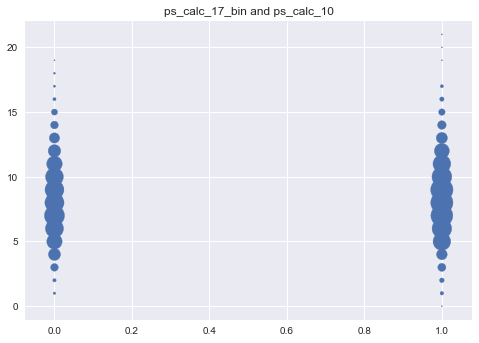

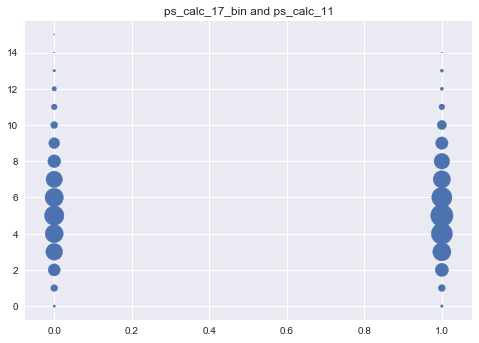

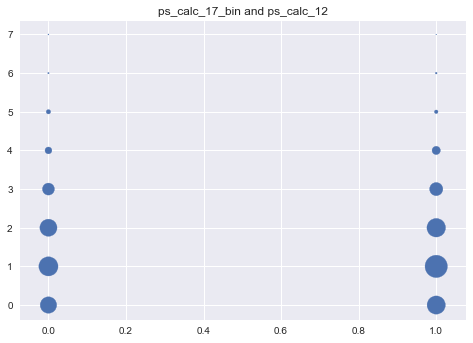

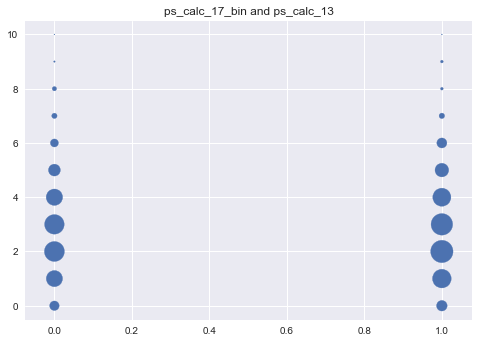

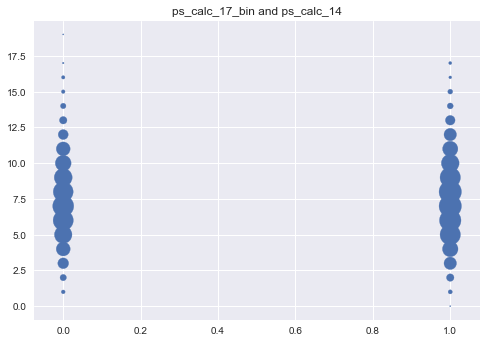

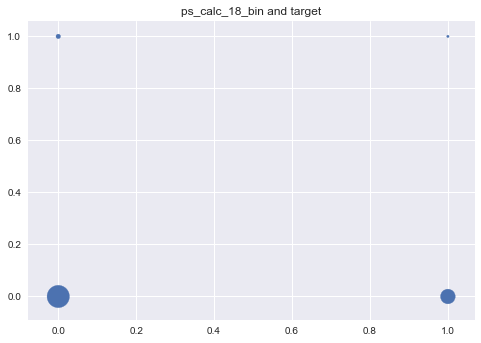

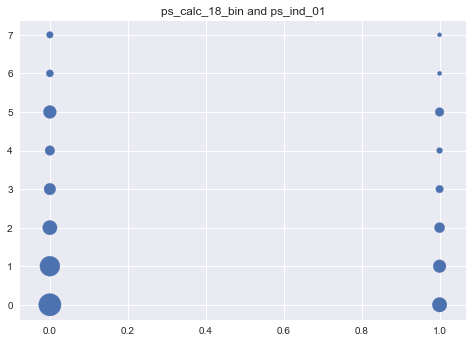

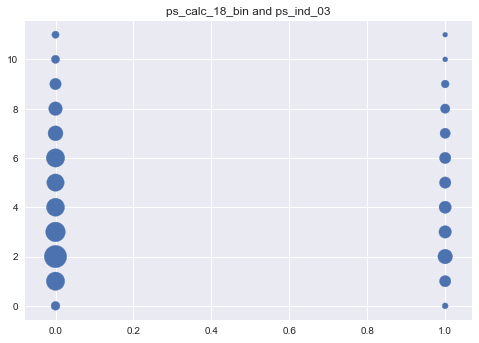

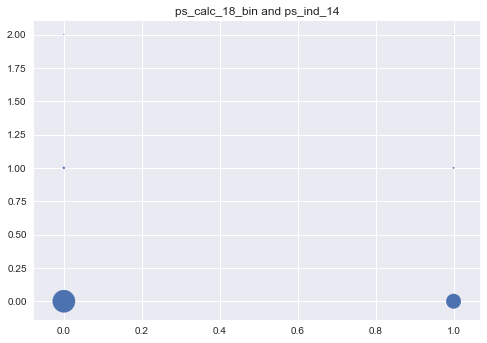

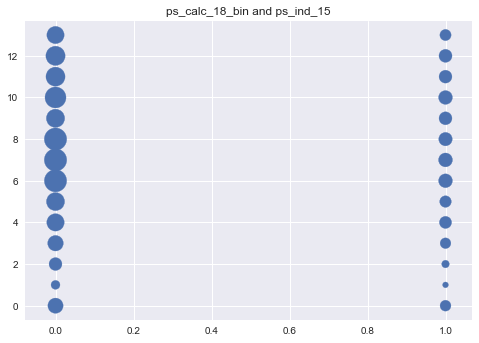

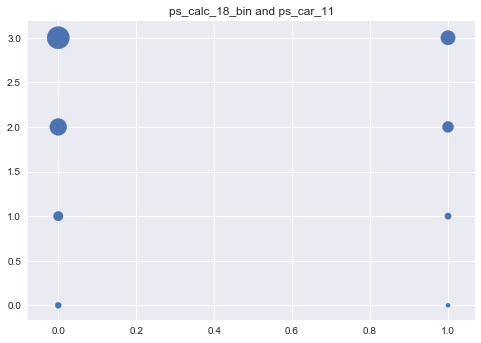

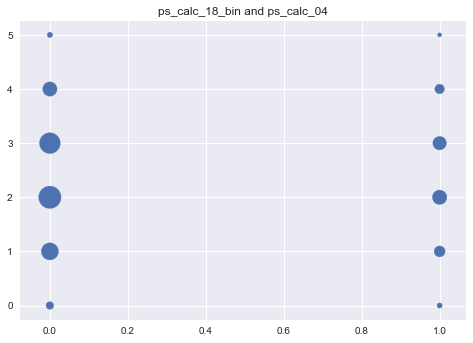

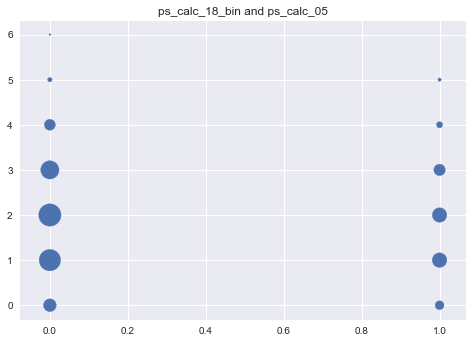

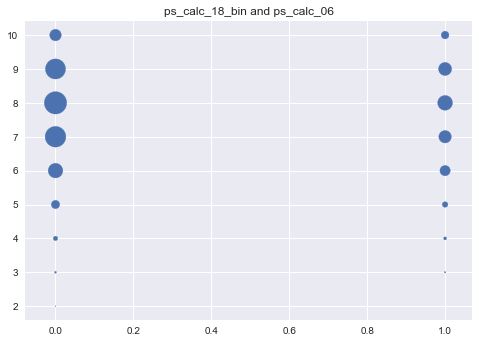

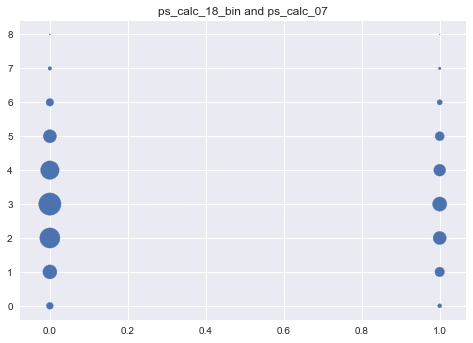

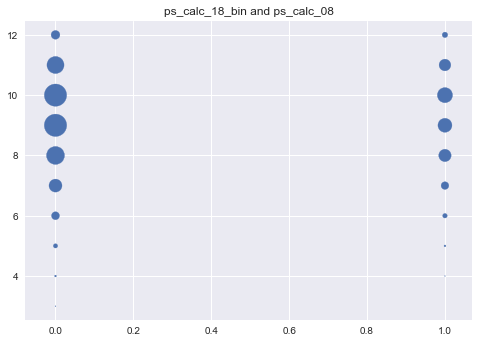

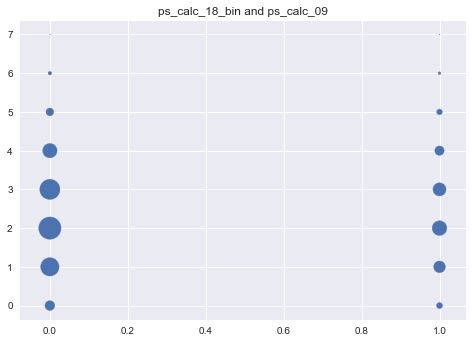

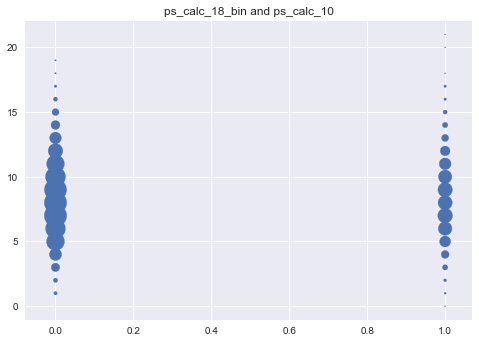

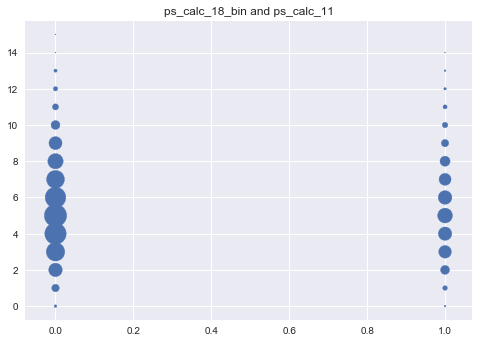

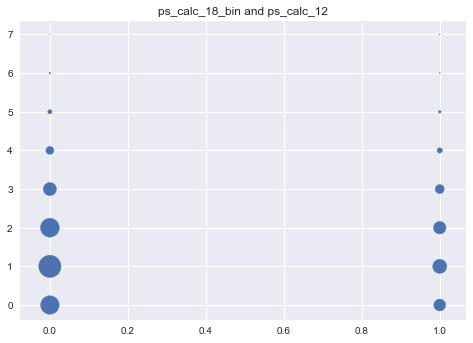

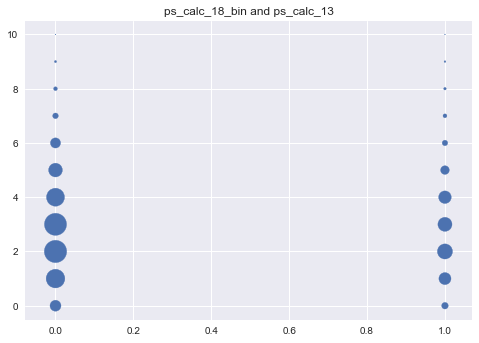

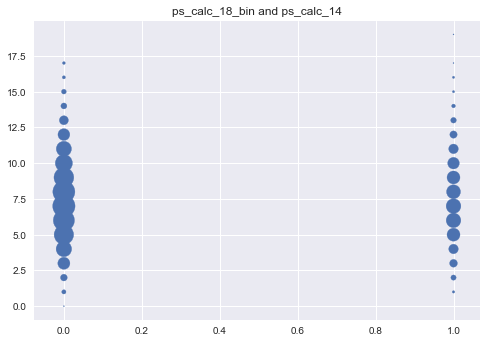

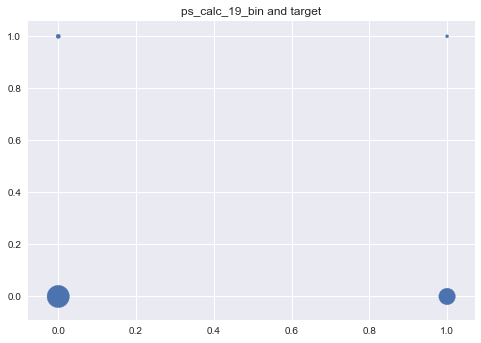

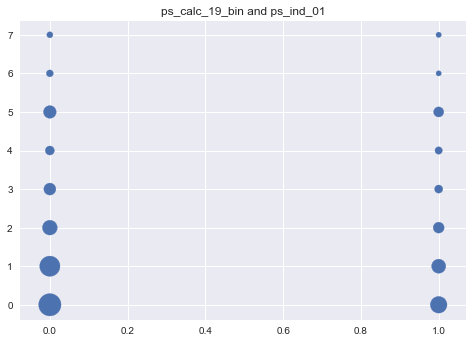

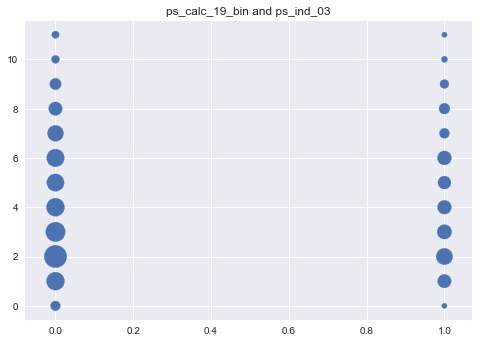

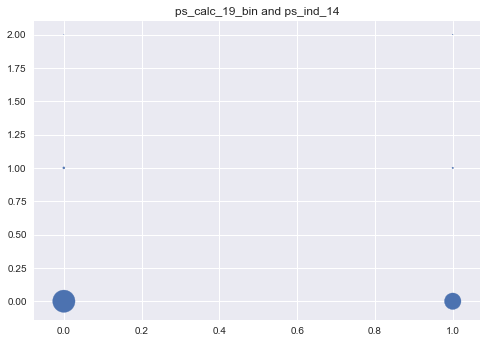

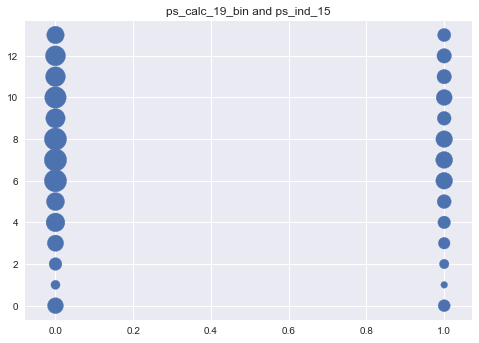

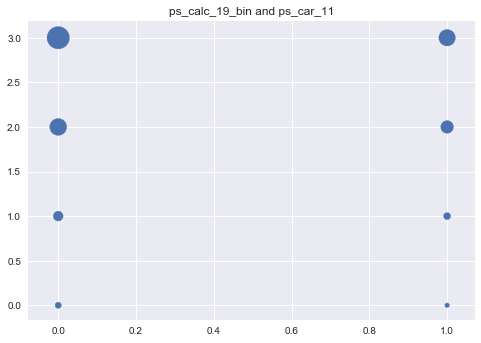

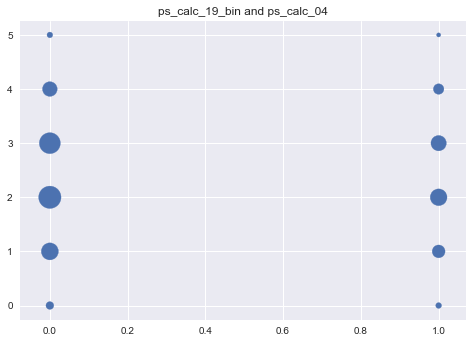

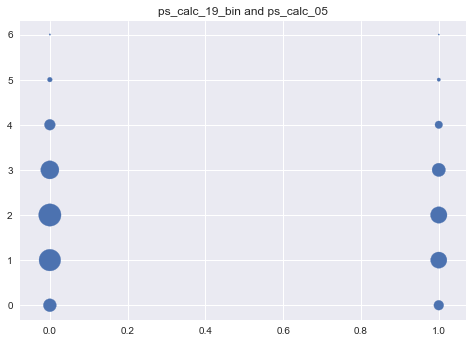

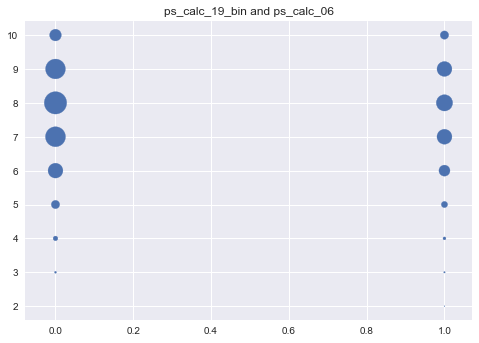

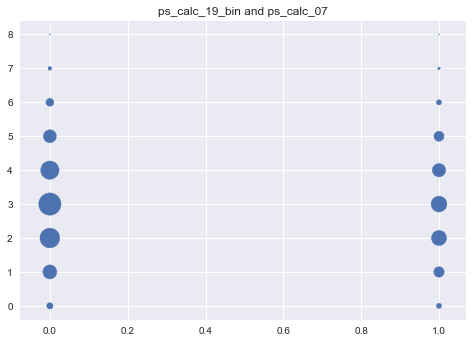

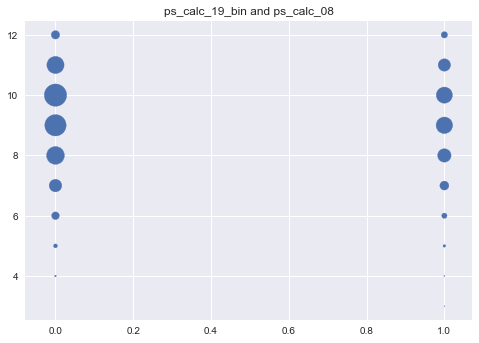

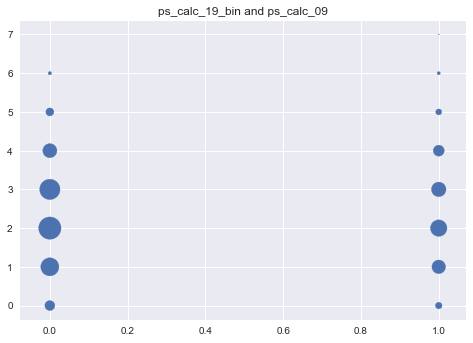

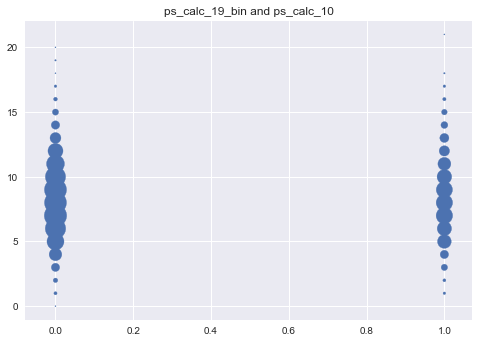

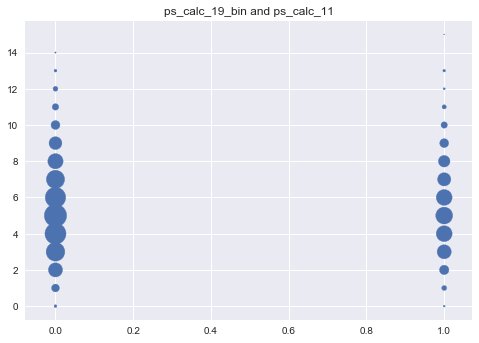

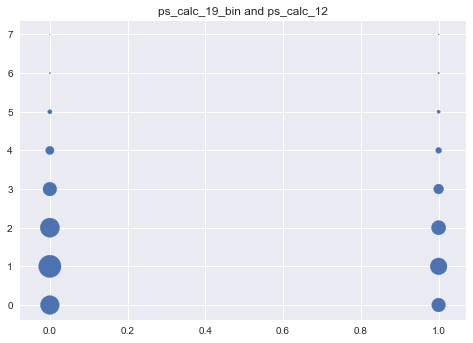

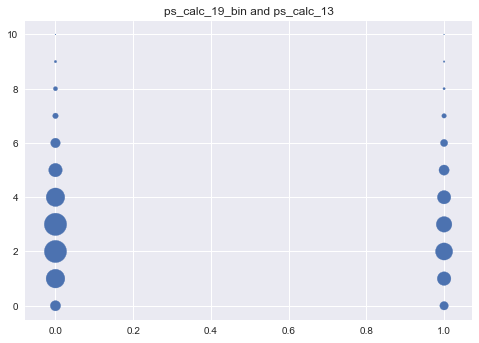

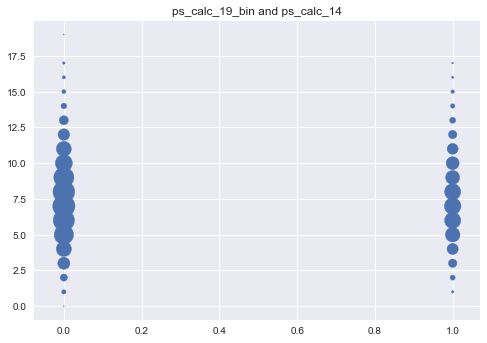

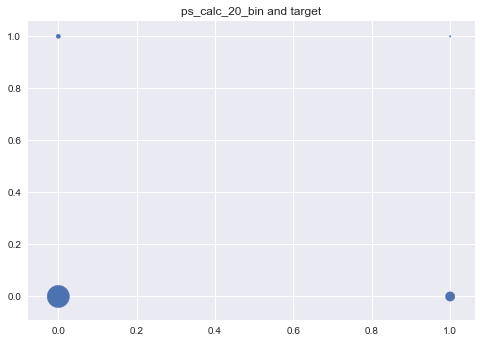

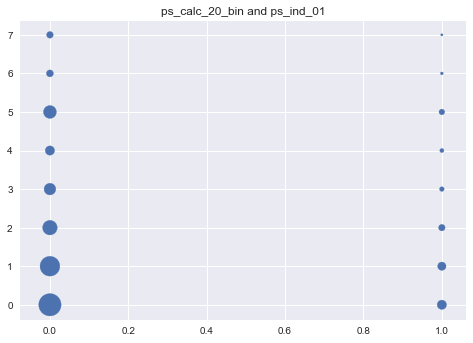

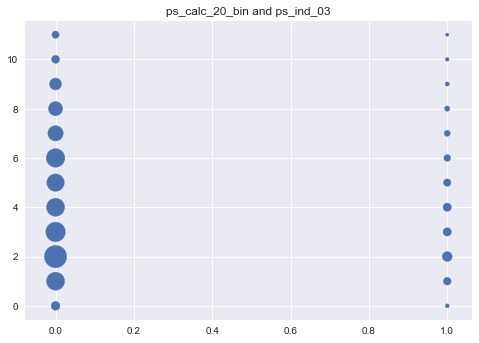

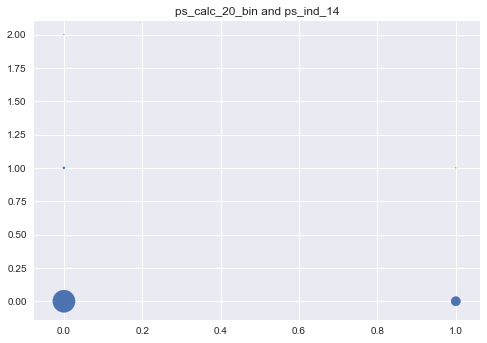

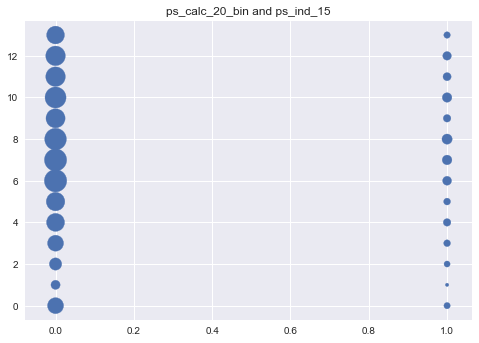

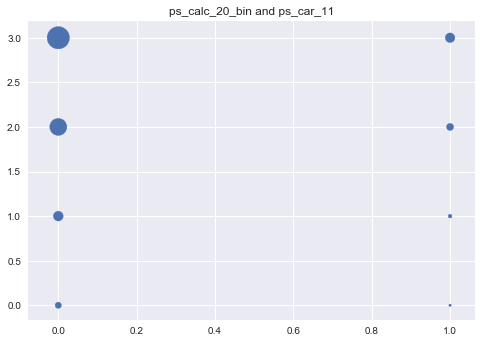

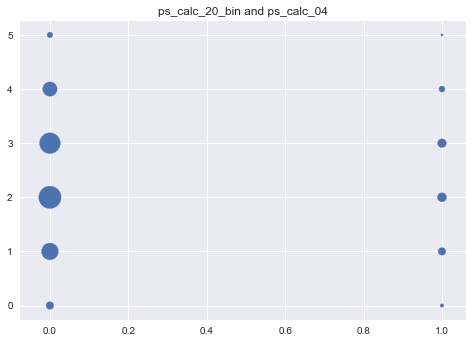

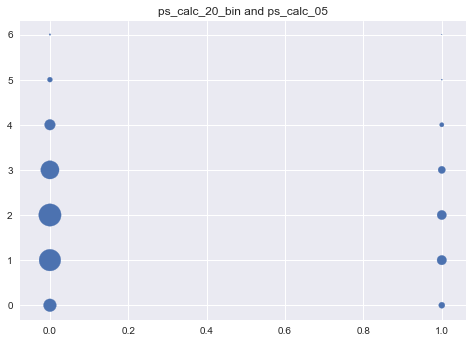

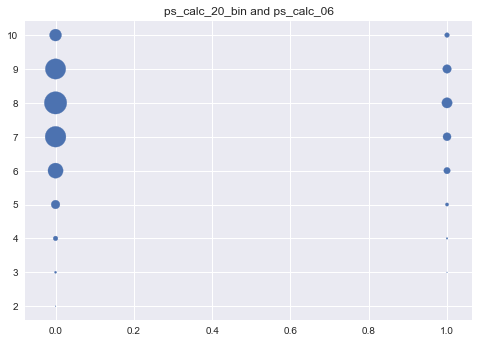

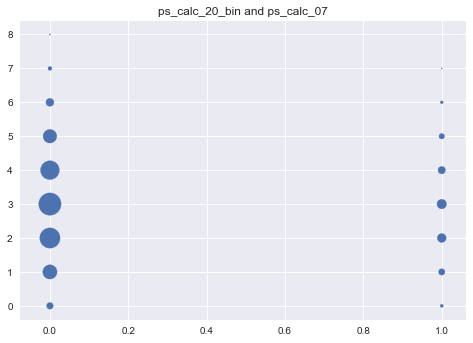

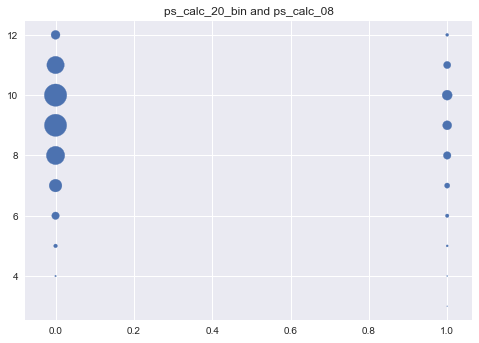

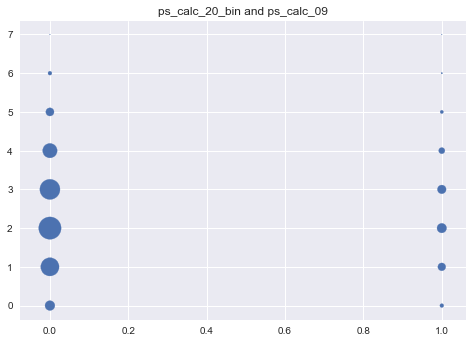

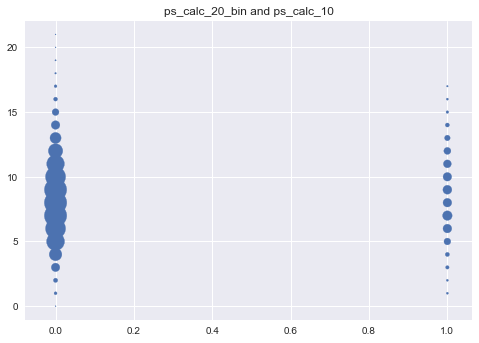

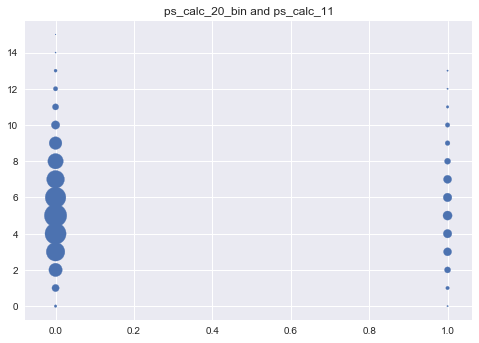

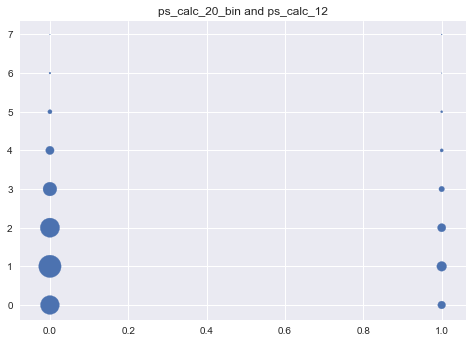

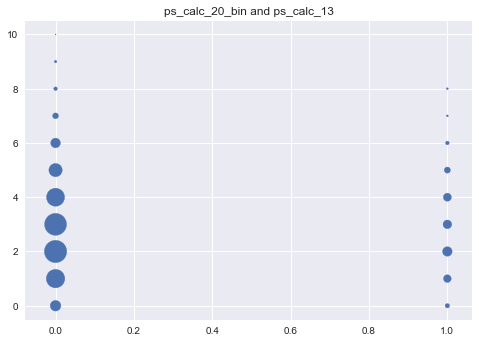

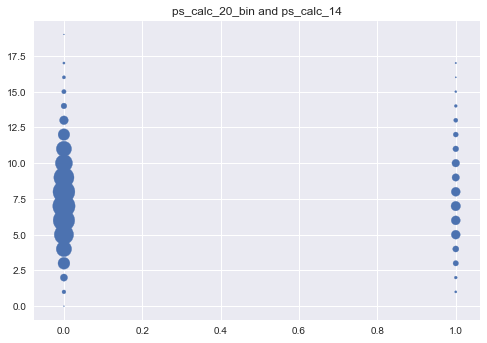

In [197]:
for col in bin_columns:
    for col2 in int_columns:
        plot_scatter(col, col2)

# Findings
* Even though data is well formed, there still are quite a few feature that contains a significant number of -1s which represetns no value
* There are a few features in the (int and float) columns that shows some sort of normal distribution
* Using scatter plot with binary joined with int continuous, I noticed that there a few plots where the trend for binary value 0 is different than binary value 1, looks like there is some sort of correlation between the two features